# Data transformation and inference

### Imports

In [1]:
import pandas as pd
import re
import numpy as np

### Imports and settings

In [2]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(12, 12), dpi=80, facecolor='w', edgecolor='k')

<Figure size 960x960 with 0 Axes>

In [3]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12.0, 6.0]
plt.rcParams['figure.dpi'] = 80

In [4]:
pd.set_option('display.max_columns', None)
#pd.set_option('max_colwidth', -1)

In [5]:
import seaborn as sns

sns.set_context("talk")

## Reading the CSV data source

In [6]:
df = pd.read_csv('houses_full.csv', encoding='utf-8')

In [7]:
df.head()

Unnamed: 0          Lokacija:  \
0  http://www.remax-svijetnekretnina.com/poslovni...       Veruda, Pula   
1  http://www.remax-svijetnekretnina.com/stan/ist...  Širi centar, Pula   
2  http://www.remax-svijetnekretnina.com/kuca/ist...        Stoja, Pula   
3  http://www.remax-svijetnekretnina.com/stan/rov...             Rovinj   
4  http://www.remax-svijetnekretnina.com/gradevin...             Barban   

  Transakcija:      Vrsta nekretnine:  Ukupan broj soba:  Toaleti:  \
0   Za prodaju       Poslovni prostor                1.0       1.0   
1   Za prodaju          Stan/Apartman                3.0       1.0   
2   Za prodaju         Kuća/Vikendica               12.0       NaN   
3   Za prodaju          Stan/Apartman                3.0       NaN   
4   Za prodaju  Građevinsko zemljište                NaN       NaN   

   Ukupno katova:                   Cijena:  Površina:  \
0             1.0     52.000 € (386.143 kn)   20,80 m2   
1             1.0     70.000 € (519.808 kn)   58,70 m2   
2             3.0  935.000 € (6.943.144 kn)     450 m2   
3             3.0    115.000 € (853.970 kn)      55 m2   
4             NaN  700.000 € (5.198.076 kn)  46.278 m2   

                  Okućnica: Godina izgradnje: Nekretnina (stanje):  \
0             nema okućnice         1998 god.             dovršena   
1  zajednička na korištenje         1900 god.             dovršena   
2                       NaN         1990 god.             dovršena   
3             nema okućnice               NaN             dovršena   
4                       NaN               NaN                  NaN   

  Stil gradnje: Razred energetske učinkovitosti: Lift:  Pristup invalidima:  \
0       moderan                                B    ne                   da   
1      klasičan                         U izradi    ne  uz manju adaptaciju   
2      klasičan                         U izradi    ne                   ne   
3      klasičan                         U izradi    ne                   ne   
4           NaN                              NaN   NaN                  NaN   

  Nekretnina se prodaje/iznajmljuje: Visina plafona:  \
0                         namještena           3,2 m   
1              namještaj po dogovoru             NaN   
2                         namještena             NaN   
3              djelomično namještena             NaN   
4                                NaN             NaN   

        Namjena poslovnog prostora: P.P. sa izlogom:  \
0  Tiha djelatnost, frizerski salon               da   
1                               NaN              NaN   
2                               NaN              NaN   
3                               NaN              NaN   
4                               NaN              NaN   

  Pristup kamionima/šleperima:    Struja: Parking: Parking (broj):  \
0                           da  monofazna       da   Pokraj zgrade   
1                          NaN        NaN       ne             NaN   
2                          NaN        NaN       da               5   
3                          NaN        NaN       da               1   
4                          NaN        NaN      NaN             NaN   

  Natkriveni parking: Povlašteni parking: Garaža: Pogled na more: Pogled na:  \
0                  ne                  ne      ne              ne    Naselje   
1                  ne                  ne      da              ne    Naselje   
2                  da                  da      da              da       more   
3                  ne                  ne      ne              ne        NaN   
4                 NaN                 NaN     NaN              ne        NaN   

  Udaljenost od mora: Ključ u agenciji:  \
0           500-1000m                Ne   
1         više od 1km                Ne   
2              2. red                Ne   
3         više od 1km                Ne   
4         više od 1km               NaN   

                                               naziv  \
0  Istra, Veruda, Pula, poslovni p

In [8]:
list(df.columns.values)

['Unnamed: 0',
 'Lokacija:',
 'Transakcija:',
 'Vrsta nekretnine:',
 'Ukupan broj soba:',
 'Toaleti:',
 'Ukupno katova:',
 'Cijena:',
 'Površina:',
 'Okućnica:',
 'Godina izgradnje:',
 'Nekretnina (stanje):',
 'Stil gradnje:',
 'Razred energetske učinkovitosti:',
 'Lift:',
 'Pristup invalidima:',
 'Nekretnina se prodaje/iznajmljuje:',
 'Visina plafona:',
 'Namjena poslovnog prostora:',
 'P.P. sa izlogom:',
 'Pristup kamionima/šleperima:',
 'Struja:',
 'Parking:',
 'Parking (broj):',
 'Natkriveni parking:',
 'Povlašteni parking:',
 'Garaža:',
 'Pogled na more:',
 'Pogled na:',
 'Udaljenost od mora:',
 'Ključ u agenciji:',
 'naziv',
 'opis',
 'dodatne_oznake',
 'Spavaće sobe:',
 'Kupaonice:',
 'Površina okućnice:',
 'Površina balkona/lođe/terase:',
 'Roštilj:',
 'Dimnjak:',
 'Bazen:',
 'Vrt:',
 'Vrsta kuće/vikendice:',
 'Tlocrtna površina nekretnine:',
 'Mogućnost zamjene:',
 'Namjena terena:',
 'Površina građevinskog dijela:',
 'Površina negrađevinskog dijela:',
 'Instalacije struje:',


In [9]:
df = df.rename(columns={
    'Unnamed: 0': 'url',
    'Lokacija:': 'lokacija',
    'Transakcija:': 'transakcija',
    'Vrsta nekretnine:': 'vrsta_nekretnine',
    'Ukupan broj soba:': 'ukupan_broj_soba',
    'Toaleti:': 'toaleti',
    'Ukupno katova:': 'ukupno_katova',
    'Cijena:': 'cijena',
    'Površina:': 'povrsina',
    'Okućnica:': 'okucnica',
    'Godina izgradnje:': 'godina_izgradnje',
    'Nekretnina (stanje):': 'stanje_nekretnine',
    'Stil gradnje:':'stil_gradnje',
    'Razred energetske učinkovitosti:':'raz_energetske_ucinkovitosti',
    'Lift:':'list',
    'Pristup invalidima:':'pristup_invalidima',
    'Nekretnina se prodaje/iznajmljuje:':'nekretnina_prodaja_iznajmiljivanje',
    'Visina plafona:':'visina_plafona',
    'Namjena poslovnog prostora:':'namjena_poslovnog_prostora',
    'P.P. sa izlogom:':'pp_sa_izlogom',
    'Pristup kamionima/šleperima:':'pristup_kamionima',
    'Struja:':'struja',
    'Parking:':'parking',
    'Parking (broj):':'parking_broj',
    'Natkriveni parking:':'natkriveni_parking',
    'Povlašteni parking:':'povlasteni_parking',
    'Garaža:':'garaza',
    'Pogled na more:':'pogled_na_more',
    'Pogled na:':'pogled_na',
    'Udaljenost od mora:':'udaljenost_od_mora',
    'Ključ u agenciji:':'kljuc_u_agenciji',
    'Spavaće sobe:':'spavace_sobe',
    'Kupaonice:':'kupaonice',
    'Površina okućnice:':'povrsina_okucnice',
    'Površina balkona/lođe/terase:':'povrsina_balkona',
    'Roštilj:':'rostilj',
    'Dimnjak:':'dimnjak',
    'Bazen:':'bazen',
    'Vrt:':'vrt',
    'Vrsta kuće/vikendice:':'vrsta_kuce',
    'Tlocrtna površina nekretnine:':'tlocrtna_povrsina_nekretnine',
    'Mogućnost zamjene:':'mogucnost_zamjene',
    'Namjena terena:':'namjena_terena',
    'Površina građevinskog dijela:':'povrsina_gradjevinskog_dijela',
    'Površina negrađevinskog dijela:':'povrsina_negradjevinskog_dijela',
    'Instalacije struje:':'instalacija_struje',
    'Instalacije vode:':'instalacija_vode',
    'Pod: parket/laminat/pločice:':'pod_poplocan',
    'Pripojene prostorije:':'pripojene_prostorije',
    'Fasada:':'fasada',
    'Krov:':'krov',
    'Struja-zakupljena snaga:':'struja_zakupljena_snaga',
    'Vanjska stolarija:':'vanjska_stolarija',
    'Unutarnja stolarija:':'unutarnja_stolarija',
    'Kupaonica/ kuhinja:':'kuhinja'
})

In [10]:
df.loc[14, 'url']

'http://www.remax-svijetnekretnina.com/kuca/istra-barban-lijepa-kuca-s-dvoristem-u-mirnom-selu'

In [11]:
df.loc[14]

url                                   http://www.remax-svijetnekretnina.com/kuca/ist...
lokacija                                                                  Orihi, Barban
transakcija                                                                  Za prodaju
vrsta_nekretnine                                                         Kuća/Vikendica
ukupan_broj_soba                                                                      8
toaleti                                                                             NaN
ukupno_katova                                                                         2
cijena                                               180.000 € 156.000 € (1.158.428 kn)
povrsina                                                                         198 m2
okucnica                                                                            NaN
godina_izgradnje                                                                    NaN
stanje_nekretnine               

In [12]:
df.loc[1, 'povrsina']

'58,70 m2'

In [13]:
df.loc[1, 'url']

'http://www.remax-svijetnekretnina.com/stan/istrapula-siri-centar-stan-u-staroj-zgradi-visoko-prizemlje'

In [14]:
df

url           lokacija  \
0     http://www.remax-svijetnekretnina.com/poslovni...       Veruda, Pula   
1     http://www.remax-svijetnekretnina.com/stan/ist...  Širi centar, Pula   
2     http://www.remax-svijetnekretnina.com/kuca/ist...        Stoja, Pula   
3     http://www.remax-svijetnekretnina.com/stan/rov...             Rovinj   
4     http://www.remax-svijetnekretnina.com/gradevin...             Barban   
...                                                 ...                ...   
3192  http://www.remax-svijetnekretnina.com/kuca/med...            Medulin   
3193  http://www.remax-svijetnekretnina.com/poslovni...               Umag   
3194  http://www.remax-svijetnekretnina.com/poslovni...            Medulin   
3195  http://www.remax-svijetnekretnina.com/gradevin...                NaN   
3196  http://www.remax-svijetnekretnina.com/kuca/val...                NaN   

     transakcija       vrsta_nekretnine  ukupan_broj_soba  toaleti  \
0     Za prodaju       Poslovni prostor               1.0      1.0   
1     Za prodaju          Stan/Apartman               3.0      1.0   
2     Za prodaju         Kuća/Vikendica              12.0      NaN   
3     Za prodaju          Stan/Apartman               3.0      NaN   
4     Za prodaju  Građevinsko zemljište               NaN      NaN   
...          ...                    ...               ...      ...   
3192  Za prodaju         Kuća/Vikendica              13.0     11.0   
3193  Za prodaju       Poslovni prostor               NaN      NaN   
3194  Za prodaju       Poslovni prostor               NaN      NaN   
3195  Za prodaju  Građevinsko zemljište               NaN      NaN   
3196  Za prodaju         Kuća/Vikendica              10.0      NaN   

      ukupno_katova                              cijena   povrsina  \
0               1.0               52.000 € (386.143 kn)   20,80 m2   
1               1.0               70.000 € (519.808 kn)   58,70 m2   
2               3.0            935.000 € (6.943.144 kn)     450 m2   
3               3.0              115.000 € (853.970 kn)      55 m2   
4               NaN            700.000 € (5.198.076 kn)  46.278 m2   
...             ...                                 ...        ...   
3192            2.0  950.000 € 800.000 € (5.940.658 kn)     558 m2   
3193            NaN         2.070.000 € (15.371.453 kn)   1.200 m2   
3194            4.0         1.850.000 € (13.737.772 kn)   1.000 m2   
3195            NaN               93.000 € (690.602 kn)     620 m2   
3196            2.0            350.000 € (2.599.038 kn)     330 m2   

                      okucnica godina_izgradnje stanje_nekretnine  \
0                nema okućnice        1998 god.          dovršena   
1     zajednička na korištenje        1900 god.          dovršena   
2                          NaN        1990 god.          dovršena   
3                nema okućnice              NaN          dovršena   
4                          NaN              NaN               NaN   
...                        ...              ...               ...   
3192                       NaN        2005 god.               NaN   
3193                       NaN              NaN               NaN   
3194                       NaN              NaN               NaN   
3195                       NaN              NaN               NaN   
3196                       NaN              NaN               NaN   

     stil_gradnje raz_energetske_ucinkovitosti list   pristup_invalidima  \
0         moderan                            B   ne                   da   
1        klasičan                     U izradi   ne  uz manju adaptaciju   
2        klasičan                     U izradi   ne                   ne   
3        klasičan                     U izradi   ne                   ne   
4             NaN                          NaN  NaN                  NaN   
...           ...                          ...  ...                  ...   
3192      moderan                            C  NaN                  NaN

In [15]:
df.stanje_nekretnine.unique()

array(['dovršena', nan, 'nedovršena'], dtype=object)

In [16]:
df.describe()

ukupan_broj_soba     toaleti  ukupno_katova  spavace_sobe    kupaonice
count       1975.000000  546.000000    1889.000000   1858.000000  1250.000000
mean           5.587342    2.036630       2.272102      3.614101     2.675200
std            4.541974    3.926683       1.073106      2.913796     3.162294
min            1.000000    1.000000       1.000000      1.000000     1.000000
25%            3.000000    1.000000       2.000000      2.000000     1.000000
50%            4.000000    1.000000       2.000000      3.000000     2.000000
75%            7.000000    2.000000       3.000000      4.000000     3.000000
max           86.000000   86.000000      22.000000     54.000000    86.000000

## Enumerable values and why fix them

In [17]:
df.ukupno_katova.unique()

array([ 1.,  3., nan,  2.,  4.,  5., 15., 12., 22., 10.])

In [18]:
df.ukupan_broj_soba.unique()

array([ 1.,  3., 12., nan,  7.,  2., 10.,  4.,  8.,  5.,  6.,  9., 15.,
       23., 11., 13., 14., 30., 18., 17., 21., 16., 26., 20., 19., 22.,
       25., 24., 35., 86., 39.])

In [19]:
df.toaleti.unique()

array([ 1., nan,  2.,  3.,  5.,  6.,  4.,  7., 10.,  8., 13., 86., 11.])

In [20]:
df.godina_izgradnje.unique()

array(['1998 god.', '1900 god.', '1990 god.', nan, '2009 god.',
       '1985 god.', '2004 god.', '2007 god.', '1960 god.', '2019 god.',
       '2006 god.', '2018 god.', '1964 god.', '2020 god.', '1992 god.',
       '2012 god.', '2011 god.', '1984 god.', '1800 god.', '1997 god.',
       '2018-2019 god.', '2000 god.', '2002 god.', '2008 god.',
       '2016 god.', '2015 god.', '1969 god.', '1986 god.', '1899 god.',
       '2005 god.', '2014 god.', '1961 god.', '1988 god.', '1965 god.',
       '1977 god.', '1978 god.', '1920 god.', '2017, god.', '1850 god.',
       '1970 god.', '2010 god.', '1987 god.', '1994 god.', '1995 god.',
       '1979 god.', '1930 god.', '2003. god.', '2001 god.', '2017 god.',
       '1980 god.', '1976 god.', '1902 god.', '1975. god.', '1935 god.',
       '2002. god.', '1974 god.', '1880 god.', '1963 god.',
       '2004-2011 god.', '1800. god.', '1910 god.', '13 stoljeće god.',
       '1991 god.', '1973 god.', '1999 god.', '2019. god.', '1860 god.',
       '1975 god

In [21]:
with pd.option_context('max_colwidth', 300):  # more options can be specified also
    print(df[df.toaleti == 86].url)

3044    http://www.remax-svijetnekretnina.com/poslovni-prostor/novoizgradeni-hotel-sa-tri-zvjezdice-na-500m-od-plaze
Name: url, dtype: object


## Conversion of values

### Cijena

In [22]:
def convert_to_kn(row):
    cijena = row['cijena']
    if cijena:
        if cijena == 'na upit':
            return np.NaN
        else:
            return float(re.findall("\(([\d\.]+)\skn\)", row['cijena'])[0].replace('.', ''))
    else:
        return np.NaN

regexr.com/4nj14

In [23]:
df['cijena_kn'] = df.apply(convert_to_kn, axis=1)

In [24]:
df.loc[69, 'cijena']

'na upit'

In [25]:
df.loc[69, 'cijena_kn']

nan

In [26]:
df.head()

url           lokacija  \
0  http://www.remax-svijetnekretnina.com/poslovni...       Veruda, Pula   
1  http://www.remax-svijetnekretnina.com/stan/ist...  Širi centar, Pula   
2  http://www.remax-svijetnekretnina.com/kuca/ist...        Stoja, Pula   
3  http://www.remax-svijetnekretnina.com/stan/rov...             Rovinj   
4  http://www.remax-svijetnekretnina.com/gradevin...             Barban   

  transakcija       vrsta_nekretnine  ukupan_broj_soba  toaleti  \
0  Za prodaju       Poslovni prostor               1.0      1.0   
1  Za prodaju          Stan/Apartman               3.0      1.0   
2  Za prodaju         Kuća/Vikendica              12.0      NaN   
3  Za prodaju          Stan/Apartman               3.0      NaN   
4  Za prodaju  Građevinsko zemljište               NaN      NaN   

   ukupno_katova                    cijena   povrsina  \
0            1.0     52.000 € (386.143 kn)   20,80 m2   
1            1.0     70.000 € (519.808 kn)   58,70 m2   
2            3.0  935.000 € (6.943.144 kn)     450 m2   
3            3.0    115.000 € (853.970 kn)      55 m2   
4            NaN  700.000 € (5.198.076 kn)  46.278 m2   

                   okucnica godina_izgradnje stanje_nekretnine stil_gradnje  \
0             nema okućnice        1998 god.          dovršena      moderan   
1  zajednička na korištenje        1900 god.          dovršena     klasičan   
2                       NaN        1990 god.          dovršena     klasičan   
3             nema okućnice              NaN          dovršena     klasičan   
4                       NaN              NaN               NaN          NaN   

  raz_energetske_ucinkovitosti list   pristup_invalidima  \
0                            B   ne                   da   
1                     U izradi   ne  uz manju adaptaciju   
2                     U izradi   ne                   ne   
3                     U izradi   ne                   ne   
4                          NaN  NaN                  NaN   

  nekretnina_prodaja_iznajmiljivanje visina_plafona  \
0                         namještena          3,2 m   
1              namještaj po dogovoru            NaN   
2                         namještena            NaN   
3              djelomično namještena            NaN   
4                                NaN            NaN   

         namjena_poslovnog_prostora pp_sa_izlogom pristup_kamionima  \
0  Tiha djelatnost, frizerski salon            da                da   
1                               NaN           NaN               NaN   
2                               NaN           NaN               NaN   
3                               NaN           NaN               NaN   
4                               NaN           NaN               NaN   

      struja parking   parking_broj natkriveni_parking povlasteni_parking  \
0  monofazna      da  Pokraj zgrade                 ne                 ne   
1        NaN      ne            NaN                 ne                 ne   
2        NaN      da              5                 da                 da   
3        NaN      da              1                 ne                 ne   
4        NaN     NaN            NaN                NaN                NaN   

  garaza pogled_na_more pogled_na udaljenost_od_mora kljuc_u_agenciji  \
0     ne             ne   Naselje          500-1000m               Ne   
1     da             ne   Naselje        više od 1km               Ne   
2     da             da      more             2. red               Ne   
3     ne             ne       NaN        više od 1km               Ne   
4    NaN             ne       NaN        više od 1km              NaN   

                                               naziv  \
0  Istra, Veruda, Pula, poslovni prostor-frizersk...   
1  Istra,Pula, širi centar, stan u staroj zgradi,...   
2  Istra, Pula, Stoja, Kuća pogled more (ID: 3000...   
3  Rovinj-stan u novijoj zgradi,visoke kvalitete ...   
4  ISTRA, BARBAN - Veliko zemljište 5ha za invest...   

                   

In [27]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(df[['cijena', 'cijena_kn']])

                                       cijena   cijena_kn
0                       52.000 € (386.143 kn)    386143.0
1                       70.000 € (519.808 kn)    519808.0
2                    935.000 € (6.943.144 kn)   6943144.0
3                      115.000 € (853.970 kn)    853970.0
4                    700.000 € (5.198.076 kn)   5198076.0
5                                 3 € (19 kn)        19.0
6                    235.000 € (1.745.068 kn)   1745068.0
7                    155.000 € (1.151.003 kn)   1151003.0
8                    247.800 € (1.840.119 kn)   1840119.0
9                    270.000 € (2.004.972 kn)   2004972.0
10                   245.000 € (1.819.327 kn)   1819327.0
11                   542.000 € (4.024.796 kn)   4024796.0
12                      63.000 € (467.827 kn)    467827.0
13                   299.000 € (2.220.321 kn)   2220321.0
14         180.000 € 156.000 € (1.158.428 kn)   1158428.0
15                      19.500 € (144.804 kn)    144804.0
16            

### Godina izgradnje

In [28]:
def replace_godina_izgradnje(row):
    if row.godina_izgradnje is not np.NaN:
        if re.match("([\d]+)", row.godina_izgradnje):
            return int(re.findall("([\d]+)", row['godina_izgradnje'])[0])
        else:
            return np.NaN
    else:
        return np.NaN

In [29]:
df['godina_izgradnje_broj'] = df.apply(replace_godina_izgradnje, axis=1)

In [30]:
df.loc[3, 'godina_izgradnje']
df.loc[192, 'godina_izgradnje']
df.loc[1614, 'godina_izgradnje']
df.loc[444, 'godina_izgradnje_broj'] = np.NaN
df.loc[676, 'godina_izgradnje_broj'] = int('2020')

In [31]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(df[['godina_izgradnje', 'godina_izgradnje_broj']])

                        godina_izgradnje  godina_izgradnje_broj
0                              1998 god.                 1998.0
1                              1900 god.                 1900.0
2                              1990 god.                 1990.0
3                                    NaN                    NaN
4                                    NaN                    NaN
5                                    NaN                    NaN
6                              2009 god.                 2009.0
7                              1985 god.                 1985.0
8                                    NaN                    NaN
9                                    NaN                    NaN
10                             2004 god.                 2004.0
11                                   NaN                    NaN
12                                   NaN                    NaN
13                             2007 god.                 2007.0
14                                   NaN

regexr.com/4n91b

In [32]:
df.loc[0, 'povrsina']

'20,80 m2'

### Povrsina

In [33]:
def replace_povrsina(row):
    if row.povrsina is not np.NaN:
        if re.match("(\d+(\.\d+)?\,?\d+) m2", row.povrsina):
            return float(re.match("(\d+(\.\d+)?\,?\d+) m2", row.povrsina)[1].replace('.', '').replace(',', '.'))
        else:
            return np.NaN
    else:
        return np.NaN

In [34]:
df['povrsina_broj'] = df.apply(replace_povrsina, axis=1)

In [35]:
df.loc[4, 'url']

'http://www.remax-svijetnekretnina.com/gradevinsko-zemljiste/istra-barban-veliko-zemljiste-5ha-za-investicijsko-ulaganje'

In [36]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(df[['povrsina', 'povrsina_broj']])

          povrsina  povrsina_broj
0         20,80 m2          20.80
1         58,70 m2          58.70
2           450 m2         450.00
3            55 m2          55.00
4        46.278 m2       46278.00
5       190.466 m2      190466.00
6           126 m2         126.00
7            54 m2          54.00
8         3.540 m2        3540.00
9         1.280 m2        1280.00
10        76,78 m2          76.78
11        5.420 m2        5420.00
12        1.999 m2        1999.00
13          145 m2         145.00
14          198 m2         198.00
15          600 m2         600.00
16          575 m2         575.00
17        59,36 m2          59.36
18           75 m2          75.00
19        3.608 m2        3608.00
20          586 m2         586.00
21        31,92 m2          31.92
22           44 m2          44.00
23        2.410 m2        2410.00
24       42.181 m2       42181.00
25        2.532 m2        2532.00
26           43 m2          43.00
27          113 m2         113.00
28           4

## Vrsta nekretnine

In [37]:
df.vrsta_nekretnine.unique()

array(['Poslovni prostor', 'Stan/Apartman', 'Kuća/Vikendica',
       'Građevinsko zemljište', 'Negrađevinsko zemljište',
       'Industrijski objekti', 'Ugostiteljski objekti',
       'Trgovački objekti', 'Hoteli i pansioni', 'Garaža'], dtype=object)

In [38]:
len(df[df.vrsta_nekretnine == 'Stan/Apartman'])

600

In [39]:
len(df[df.vrsta_nekretnine.isin(['Stan/Apartman', 'Kuća/Vikendica'])])

1892

In [40]:
len(df[df.vrsta_nekretnine == 'Kuća/Vikendica'])

1292

In [41]:
stanovi_kuce_df = df[df.vrsta_nekretnine.isin(['Stan/Apartman', 'Kuća/Vikendica'])]

In [42]:
#kuce_df = df[df.vrsta_nekretnine == 'Kuća/Vikendica']
kuce_df = df[df.vrsta_nekretnine == 'Stan/Apartman']

## Kuce (bez stanova)

In [43]:
kuce_df

url           lokacija  \
1     http://www.remax-svijetnekretnina.com/stan/ist...  Širi centar, Pula   
3     http://www.remax-svijetnekretnina.com/stan/rov...             Rovinj   
7     http://www.remax-svijetnekretnina.com/stan/ist...        Stoja, Pula   
10    http://www.remax-svijetnekretnina.com/stan/ist...    Savudrija, Umag   
17    http://www.remax-svijetnekretnina.com/stan/ist...      Mugeba, Poreč   
...                                                 ...                ...   
3162  http://www.remax-svijetnekretnina.com/stan/ist...             Fažana   
3164  http://www.remax-svijetnekretnina.com/stan/ist...       Centar, Pula   
3169  http://www.remax-svijetnekretnina.com/stan/eks...               Umag   
3170  http://www.remax-svijetnekretnina.com/stan/rov...             Rovinj   
3190  http://www.remax-svijetnekretnina.com/apartman...       Veruda, Pula   

     transakcija vrsta_nekretnine  ukupan_broj_soba  toaleti  ukupno_katova  \
1     Za prodaju    Stan/Apartman               3.0      1.0            1.0   
3     Za prodaju    Stan/Apartman               3.0      NaN            3.0   
7     Za prodaju    Stan/Apartman               2.0      NaN            4.0   
10    Za prodaju    Stan/Apartman               4.0      NaN            2.0   
17    Za prodaju    Stan/Apartman               3.0      NaN            3.0   
...          ...              ...               ...      ...            ...   
3162  Za prodaju    Stan/Apartman               3.0      1.0            3.0   
3164  Za prodaju    Stan/Apartman               4.0      1.0            2.0   
3169  Za prodaju    Stan/Apartman               2.0      NaN            3.0   
3170  Za prodaju    Stan/Apartman               3.0      1.0            3.0   
3190  Za prodaju    Stan/Apartman              15.0      7.0            4.0   

                        cijena  povrsina                  okucnica  \
1        70.000 € (519.808 kn)  58,70 m2  zajednička na korištenje   
3       115.000 € (853.970 kn)     55 m2             nema okućnice   
7     155.000 € (1.151.003 kn)     54 m2  zajednička na korištenje   
10    245.000 € (1.819.327 kn)  76,78 m2                       ima   
17      115.000 € (853.970 kn)  59,36 m2             nema okućnice   
...                        ...       ...                       ...   
3162  211.200 € (1.568.334 kn)  87,44 m2                       NaN   
3164  200.000 € (1.485.165 kn)     89 m2                       NaN   
3169  245.000 € (1.819.327 kn)       NaN                       NaN   
3170  240.000 € (1.782.198 kn)  98,50 m2                       NaN   
3190  630.000 € (4.678.268 kn)    438 m2                       NaN   

     godina_izgradnje stanje_nekretnine stil_gradnje  \
1           1900 god.          dovršena     klasičan   
3                 NaN          dovršena     klasičan   
7           1985 god.          dovršena     klasičan   
10          2004 god.          dovršena     klasičan   
17          2004 god.          dovršena     klasičan   
...               ...               ...          ...   
3162              NaN               NaN          NaN   
3164              NaN               NaN          NaN   
3169        2009 god.               NaN          NaN   
3170        1985 god.               NaN          NaN   
3190        2001 god.          dovršena          NaN   

     raz_energetske_ucinkovitosti list   pristup_invalidima  \
1                        U izradi   ne  uz manju adaptaciju   
3                        U izradi   ne                   ne   
7                              A+   ne                   ne   
10                       U izradi   ne                   ne   
17                       U izradi   ne                   ne   
...                           ...  ...                  ...   
3162                          NaN  NaN                  NaN   
3164                          NaN  NaN                  NaN   
3169                          NaN  NaN                  NaN   
3170                  

https://medium.com/hal24k-techblog/how-to-generate-neural-network-confidence-intervals-with-keras-e4c0b78ebbdf

## Visual inspection

### Površina

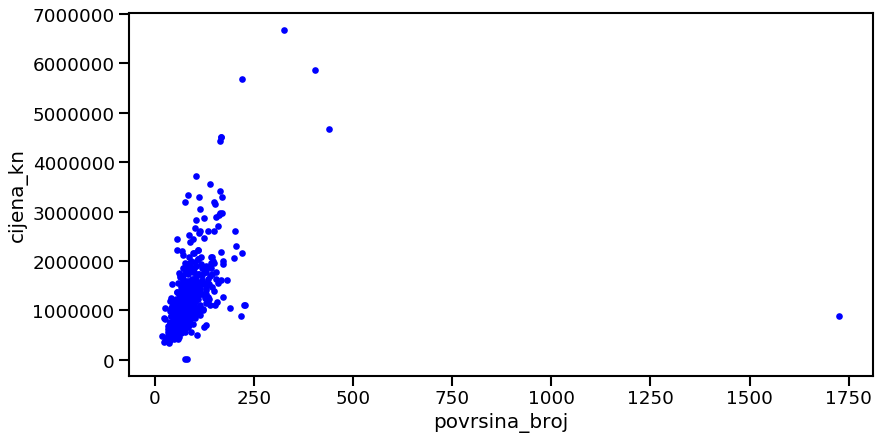

In [44]:
kuce_df.plot(kind='scatter',x='povrsina_broj',y='cijena_kn',color='blue')

##### Maknemo outlier-e

In [45]:
kuce_df = kuce_df[kuce_df.povrsina_broj < 500]

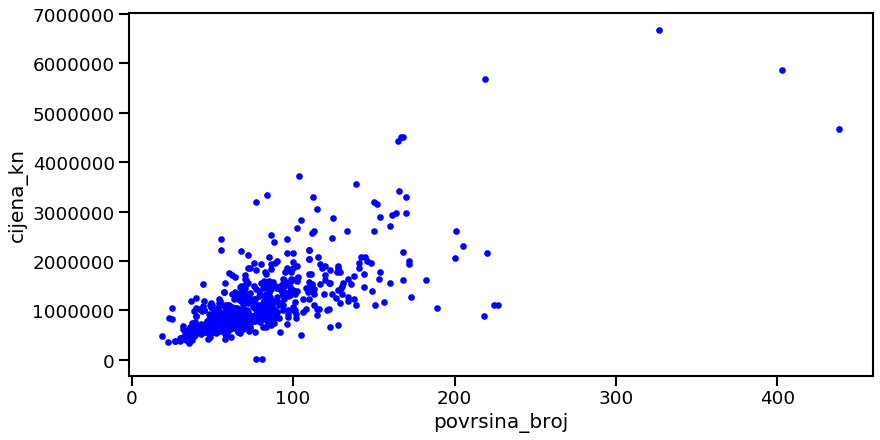

In [46]:
kuce_df.plot(kind='scatter',x='povrsina_broj',y='cijena_kn',color='blue')

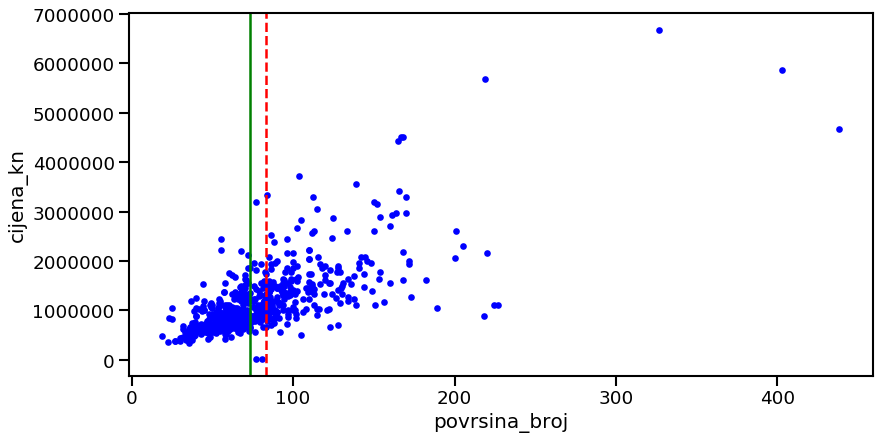

In [47]:
data_line = kuce_df.plot(kind='scatter',x='povrsina_broj',y='cijena_kn',color='blue')

# Plot the average line
plt.axvline(kuce_df['povrsina_broj'].mean(), color='r', linestyle='--')
plt.axvline(kuce_df['povrsina_broj'].median(), color='g', linestyle='solid')

plt.show()

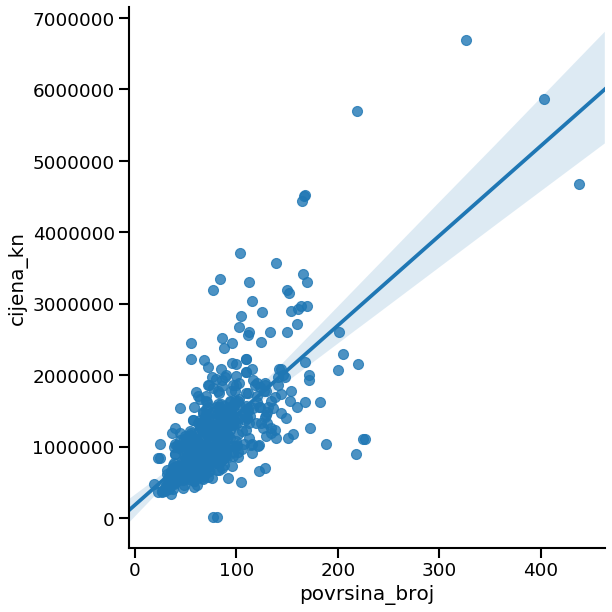

In [48]:
# Show the results of a linear regression within each dataset
sns.lmplot(x="povrsina_broj", y="cijena_kn", data=kuce_df[kuce_df.povrsina_broj < 500], height=8)

In [49]:
df['povrsina_broj'].mean()

2242.8408416770963

In [50]:
df['povrsina_broj'].median()

280.0

In [51]:
df['povrsina_broj'].std()

8246.784825051314

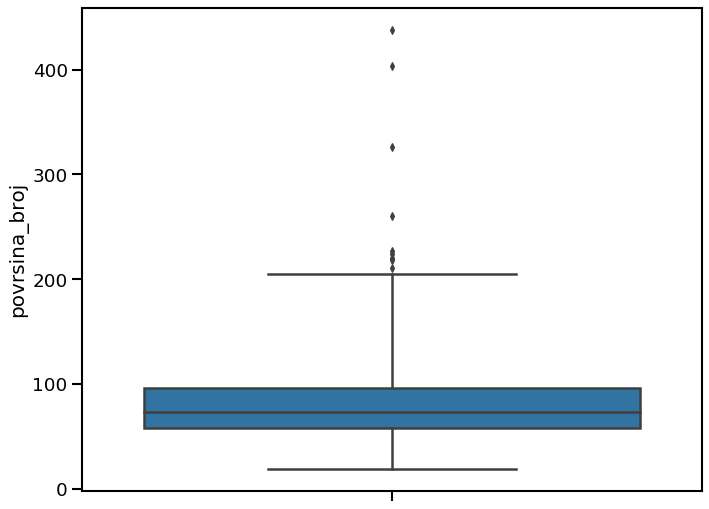

In [52]:
#sns.set(style="whitegrid")
sns.set_context("talk")
plt.figure(figsize=(10,8))
ax = sns.boxplot(x='povrsina_broj', data=kuce_df, orient="v", whis=3.0)

## Ukupan broj soba

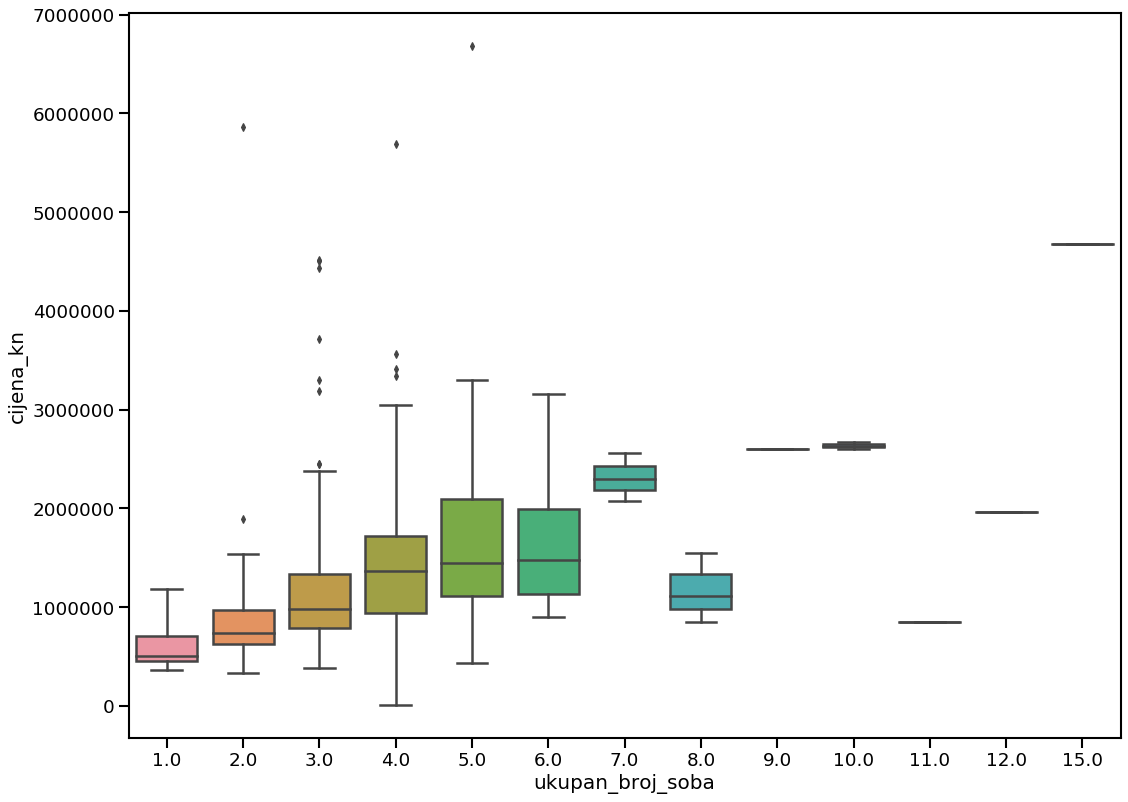

In [53]:
sns.set_context("talk")
plt.figure(figsize=(16,12))
sns.boxplot(x='ukupan_broj_soba', y='cijena_kn', data=kuce_df, orient="v", whis=2.0)

In [54]:
len(kuce_df[kuce_df.ukupan_broj_soba > 8])

6

In [55]:
kuce_df = kuce_df[kuce_df.ukupan_broj_soba <= 8]

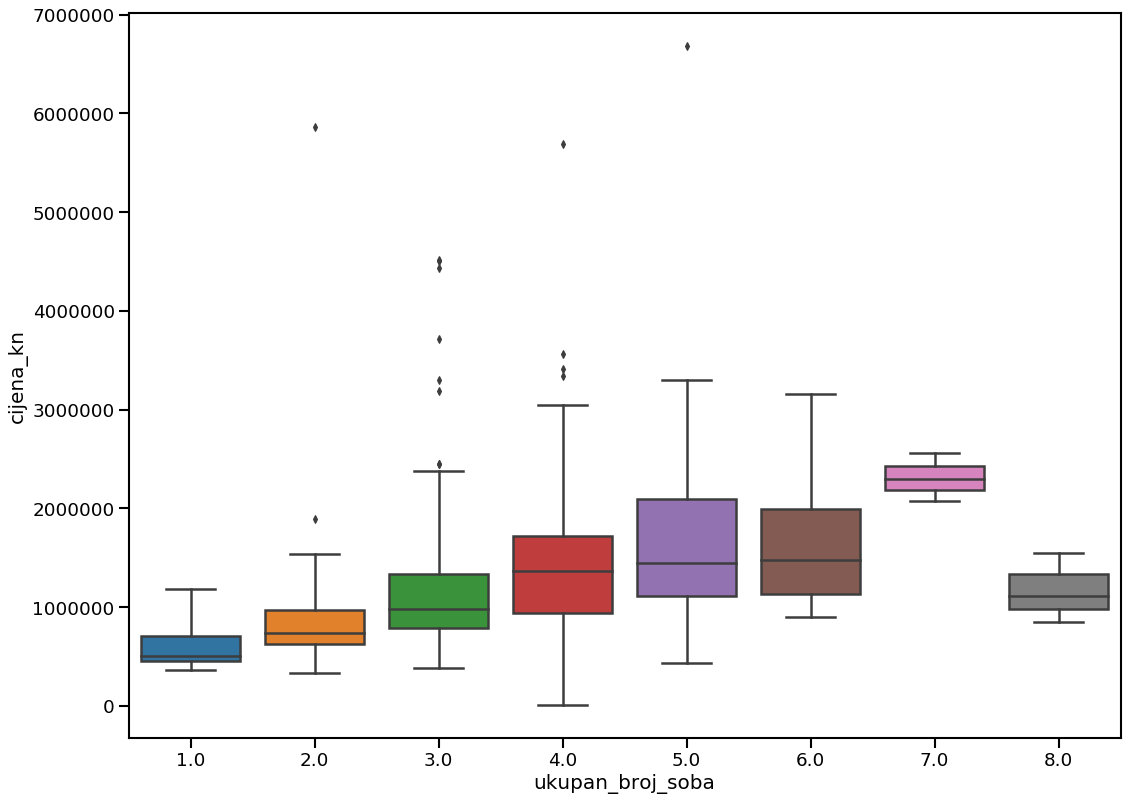

In [56]:
sns.set_context("talk")
plt.figure(figsize=(16,12))
sns.boxplot(x='ukupan_broj_soba', y='cijena_kn', data=kuce_df, orient="v", whis=2.0)

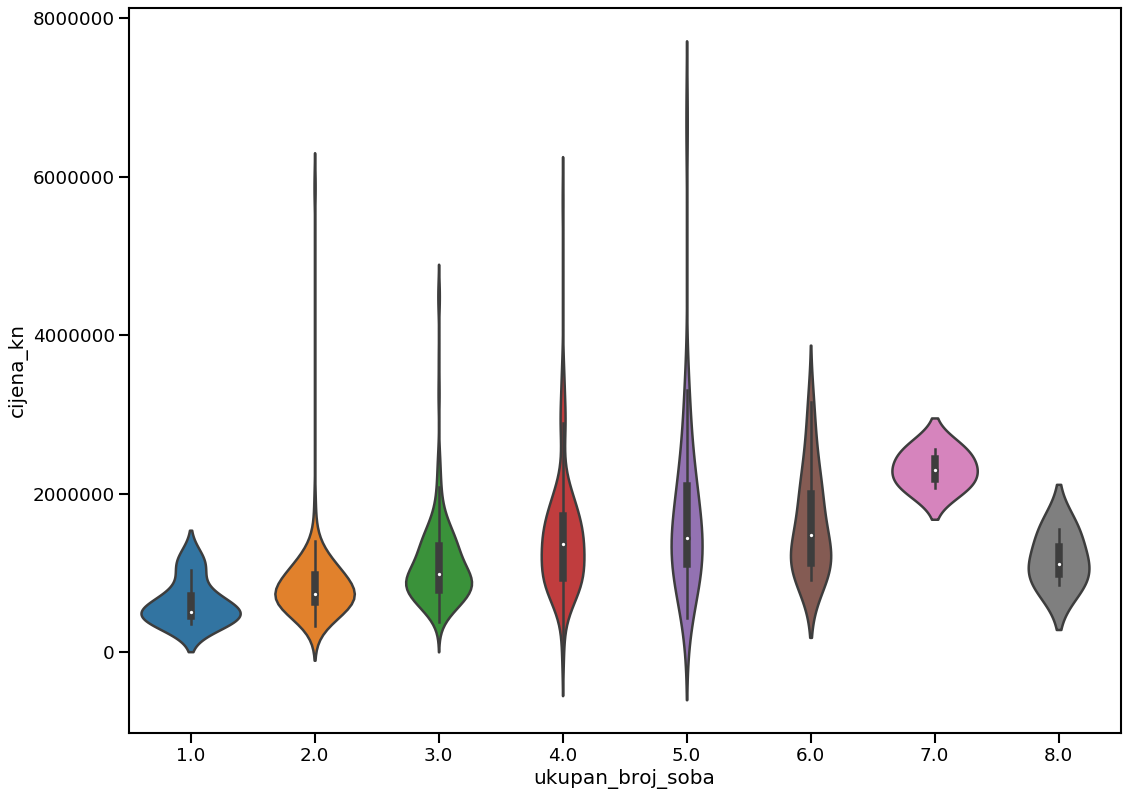

In [57]:
sns.set_context("talk")
plt.figure(figsize=(16,12))
sns.violinplot(x="ukupan_broj_soba", y="cijena_kn", data=kuce_df)

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text xticklabel objects>)

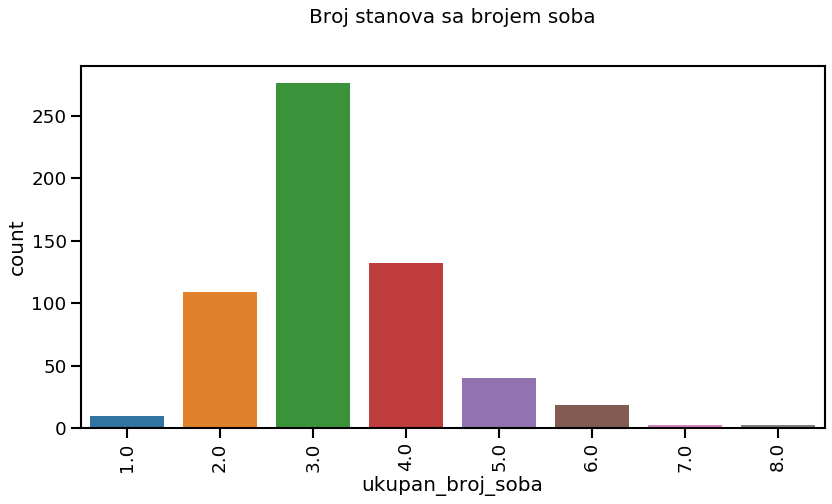

In [58]:
g = sns.countplot(x="ukupan_broj_soba",  data=kuce_df)
g.set_title("Broj stanova sa brojem soba", y=1.1)
plt.xticks(rotation=90)

In [59]:
kuce_df = kuce_df[kuce_df.ukupan_broj_soba <= 6]

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

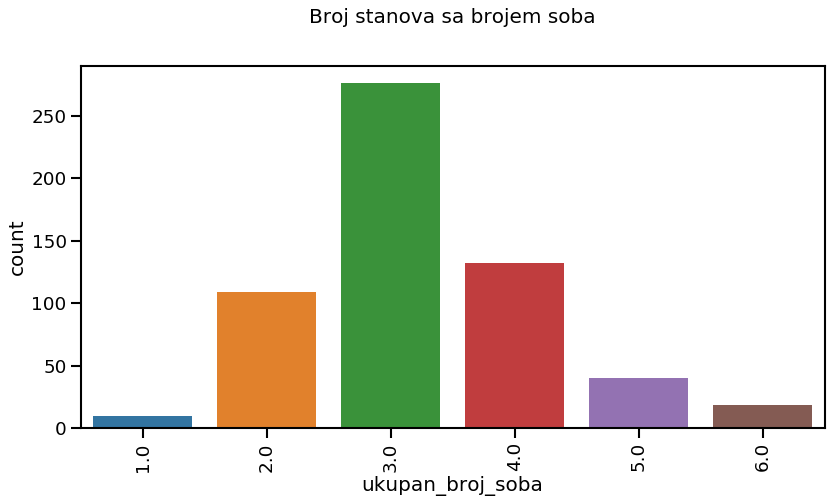

In [60]:
g = sns.countplot(x="ukupan_broj_soba",  data=kuce_df)
g.set_title("Broj stanova sa brojem soba", y=1.1)
plt.xticks(rotation=90)

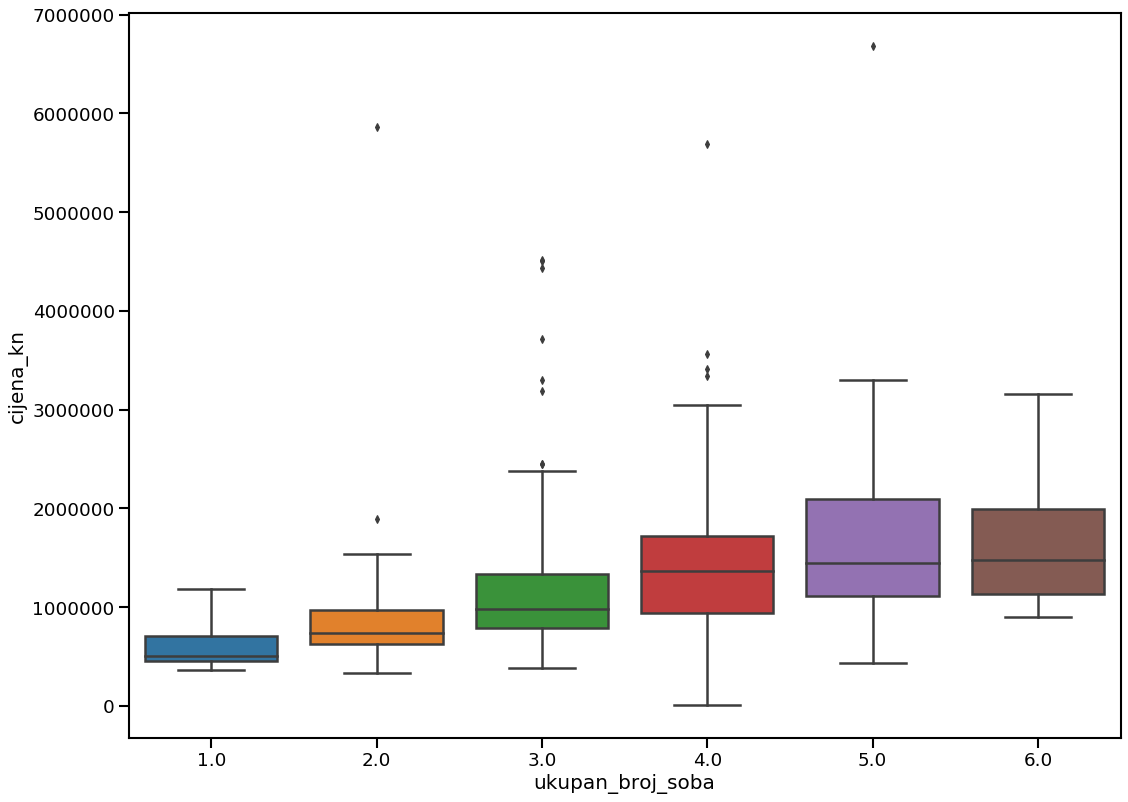

In [61]:
sns.set_context("talk")
plt.figure(figsize=(16,12))
sns.boxplot(x='ukupan_broj_soba', y='cijena_kn', data=kuce_df, orient="v", whis=2.0)

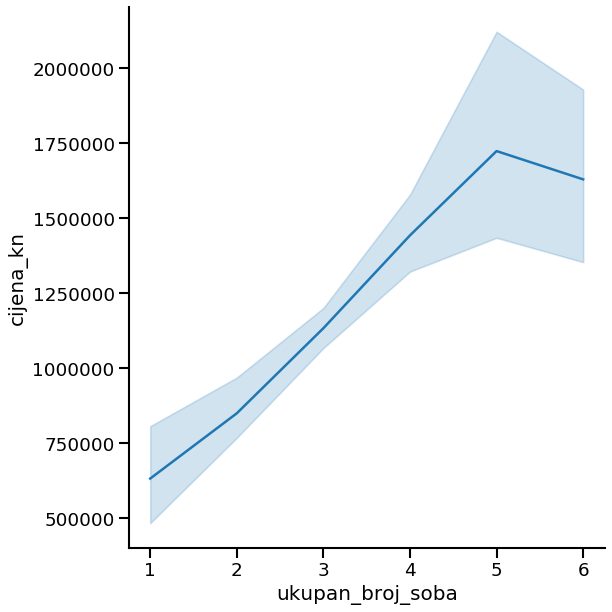

In [62]:
sns.relplot(x="ukupan_broj_soba",  y="cijena_kn", data=kuce_df, kind="line", height=8)

In [63]:
#kuce_df[kuce_df.ukupan_broj_soba == 8]

<Figure size 960x960 with 0 Axes>

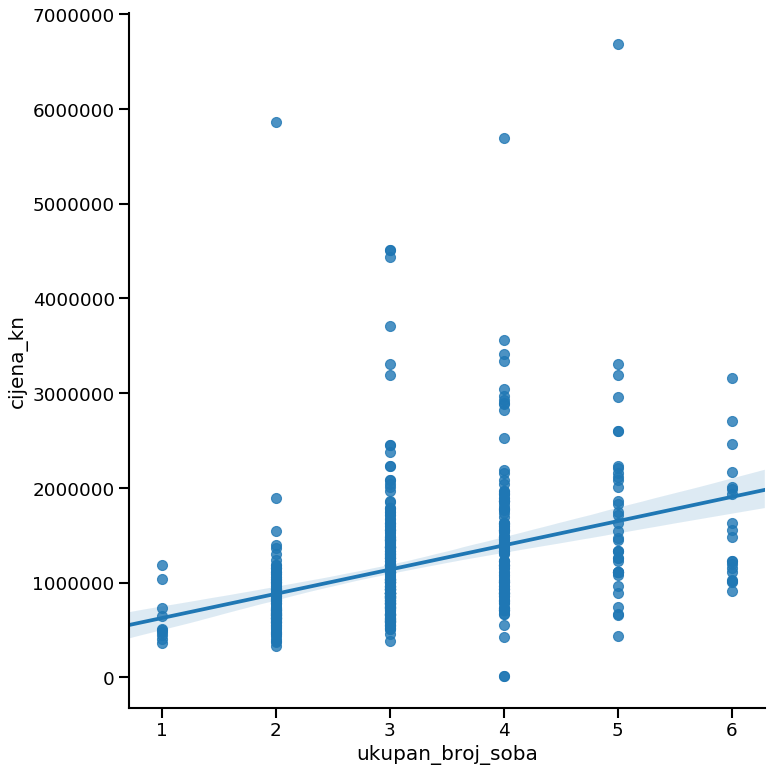

In [64]:
# Show the results of a linear regression within each dataset
plt.figure(figsize=(12,12))
sns.lmplot(x="ukupan_broj_soba", y="cijena_kn", data=kuce_df, height=10)

## Ukupno katova

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

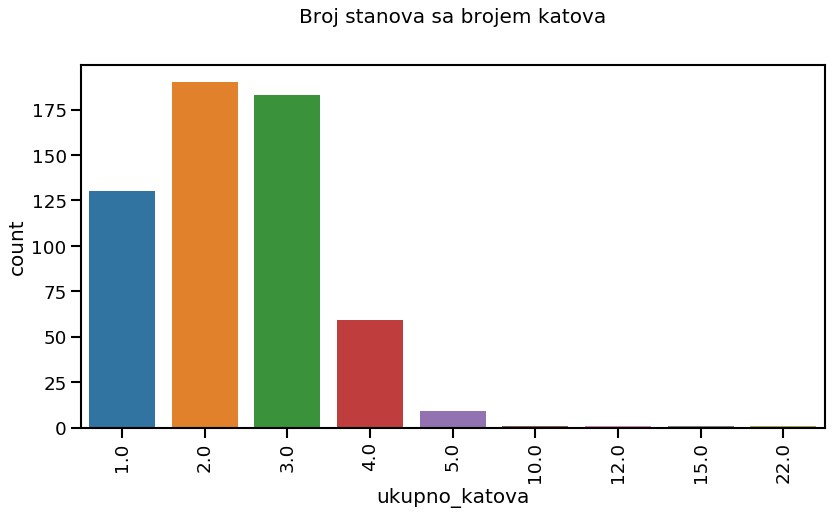

In [65]:
g = sns.countplot(x="ukupno_katova",  data=kuce_df)
g.set_title("Broj stanova sa brojem katova", y=1.1)
plt.xticks(rotation=90)

In [66]:
len(kuce_df[kuce_df.ukupno_katova > 5])

4

In [67]:
kuce_df = kuce_df[kuce_df.ukupno_katova <= 5]

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

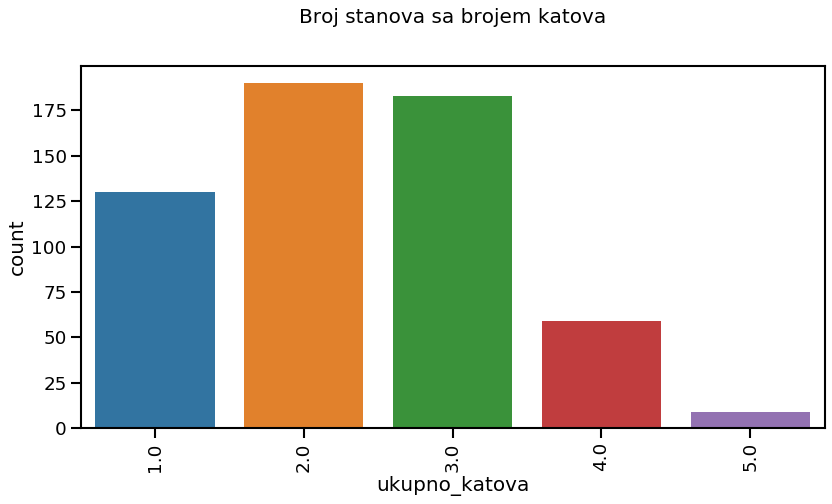

In [68]:
g = sns.countplot(x="ukupno_katova",  data=kuce_df)
g.set_title("Broj stanova sa brojem katova", y=1.1)
plt.xticks(rotation=90)

<Figure size 1280x960 with 0 Axes>

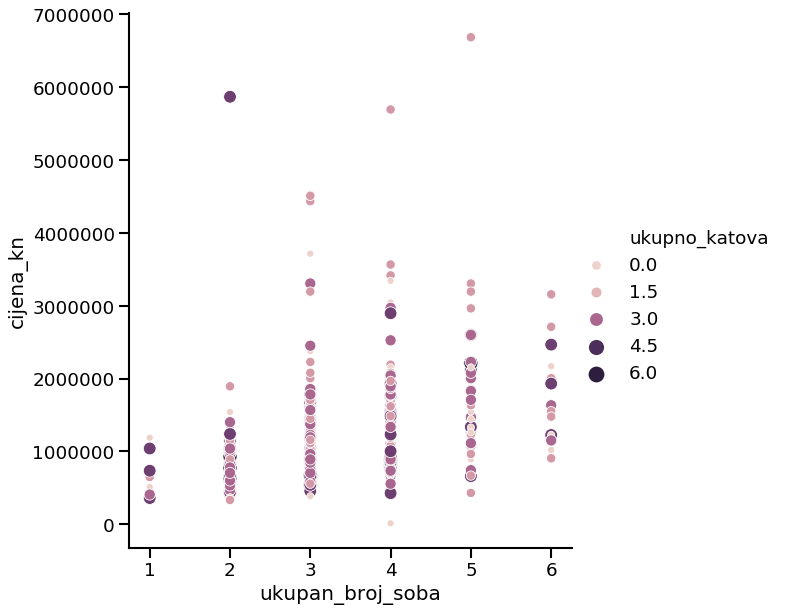

In [69]:
plt.figure(figsize=(16,12))
sns.relplot(x="ukupan_broj_soba", y="cijena_kn", data=kuce_df, kind="scatter", size="ukupno_katova", hue="ukupno_katova", height=8)

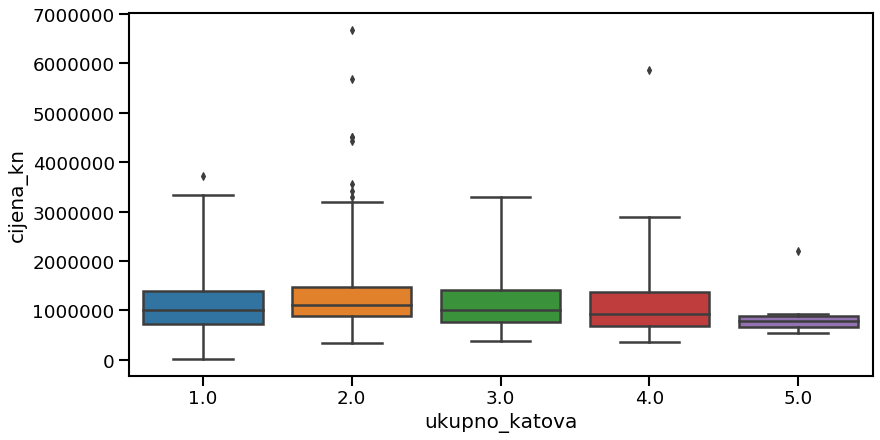

In [70]:
#sns.set(style="whitegrid")
#plt.figure(figsize=(16,12))
sns.boxplot(x='ukupno_katova', y='cijena_kn', data=kuce_df, orient="v", whis=3.0)

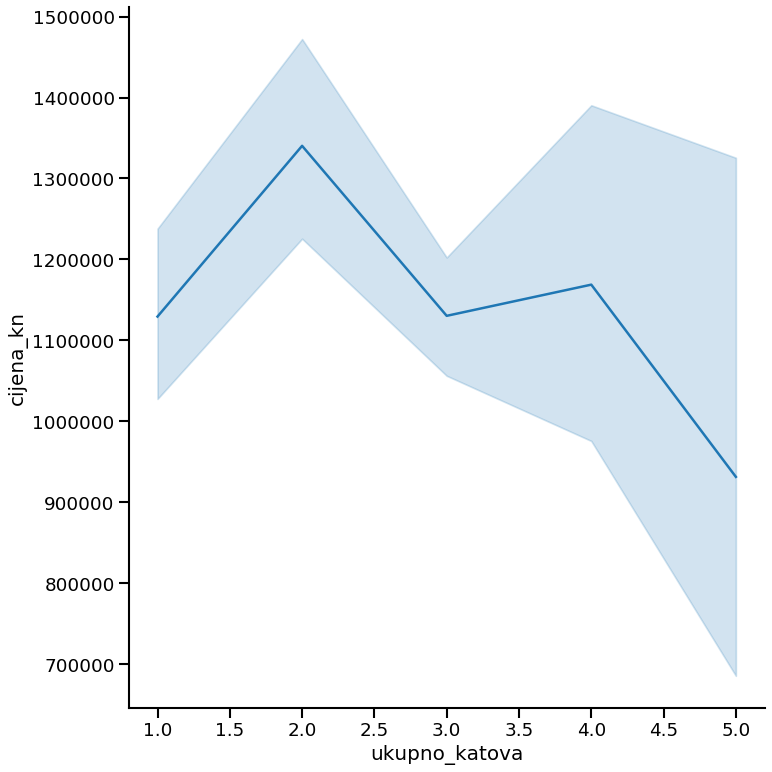

In [71]:
sns.relplot(x='ukupno_katova', y='cijena_kn', data=kuce_df, kind="line", height=10)

<Figure size 960x960 with 0 Axes>

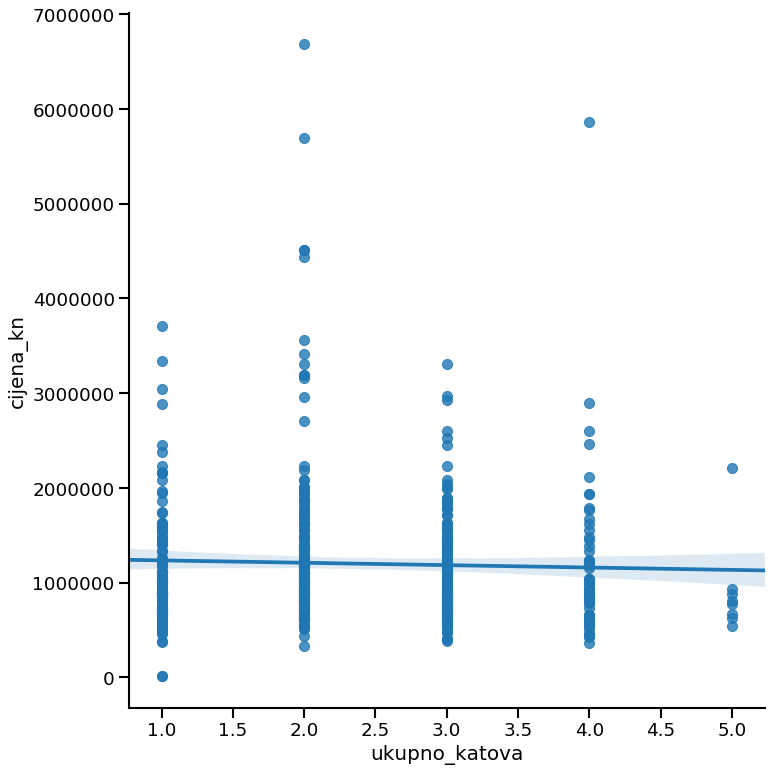

In [72]:
# Show the results of a linear regression within each dataset
plt.figure(figsize=(12,12))
sns.lmplot(x="ukupno_katova", y="cijena_kn", data=kuce_df, height=10)

In [73]:
len(kuce_df)

571

## Godina izgradnje

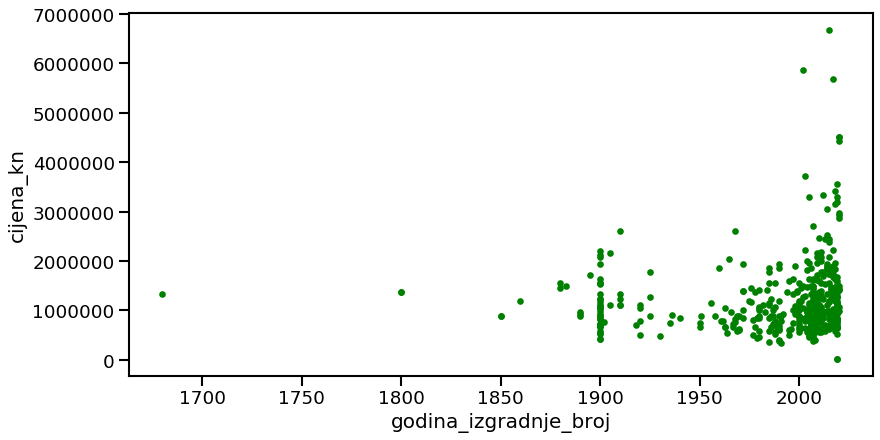

In [74]:
kuce_df.plot(kind='scatter',x='godina_izgradnje_broj',y='cijena_kn',color='green')

In [75]:
with pd.option_context('max_colwidth', 300):  # more options can be specified also
    print(kuce_df[kuce_df.godina_izgradnje_broj < 250].url)

Series([], Name: url, dtype: object)


In [76]:
len(kuce_df[kuce_df.godina_izgradnje_broj > 1800])

482

In [77]:
kuce_df = kuce_df[kuce_df.godina_izgradnje_broj > 1800]

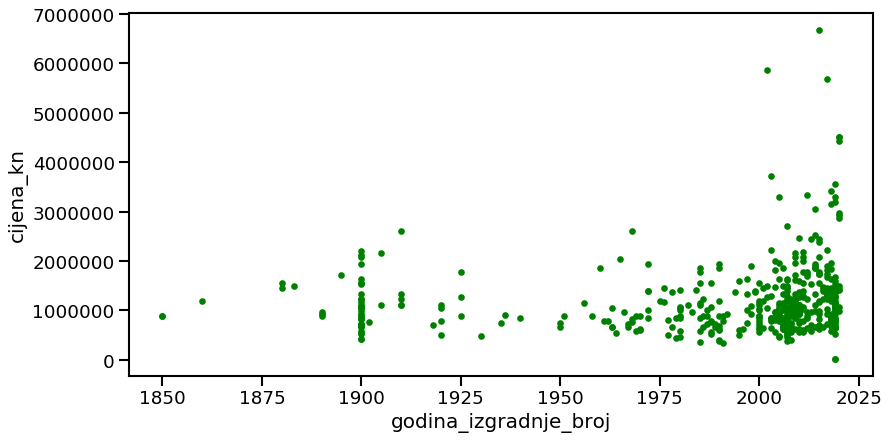

In [78]:
kuce_df.plot(kind='scatter',x='godina_izgradnje_broj',y='cijena_kn',color='green')

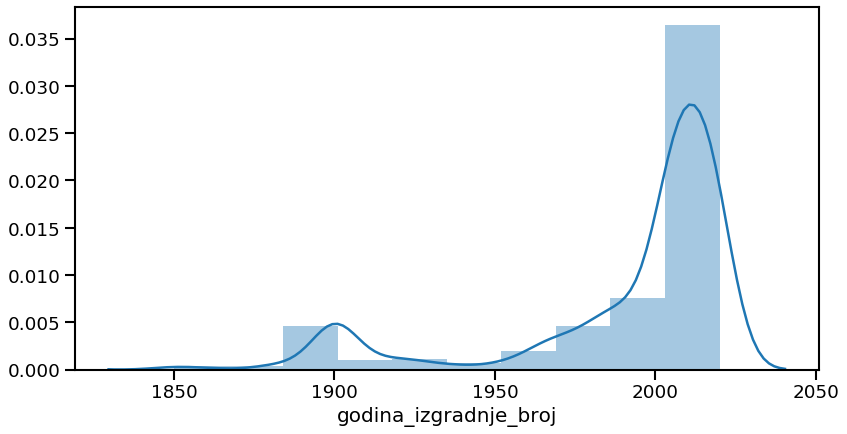

In [79]:
sns.distplot(a=kuce_df.godina_izgradnje_broj, bins=10)

## Površina okućnice

In [80]:
def replace_povrsina_okucnice(row):
    if row.povrsina_okucnice is not np.NaN:
        if re.match("(\d+(\.\d+)?\,?\d+) m2", row.povrsina_okucnice):
            return float(re.match("(\d+(\.\d+)?\,?\d+) m2", row.povrsina_okucnice)[1].replace('.', '').replace(',', '.'))
        else:
            return 0
    else:
        return 0

In [81]:
kuce_df['povrsina_okucnice_broj'] = kuce_df.apply(replace_povrsina_okucnice, axis=1)

/home/ksaric/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [82]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(kuce_df[['povrsina_okucnice', 'povrsina_okucnice_broj']])

     povrsina_okucnice  povrsina_okucnice_broj
1               200 m2                  200.00
7                  NaN                    0.00
10                 NaN                    0.00
17                 NaN                    0.00
22                 NaN                    0.00
28                 NaN                    0.00
30              700 m2                  700.00
31               80 m2                   80.00
43                 NaN                    0.00
44                 NaN                    0.00
47                 NaN                    0.00
49                 NaN                    0.00
70                 NaN                    0.00
77                 NaN                    0.00
78                 NaN                    0.00
82                 NaN                    0.00
86              133 m2                  133.00
93                 NaN                    0.00
95              200 m2                  200.00
99                 NaN                    0.00
102          

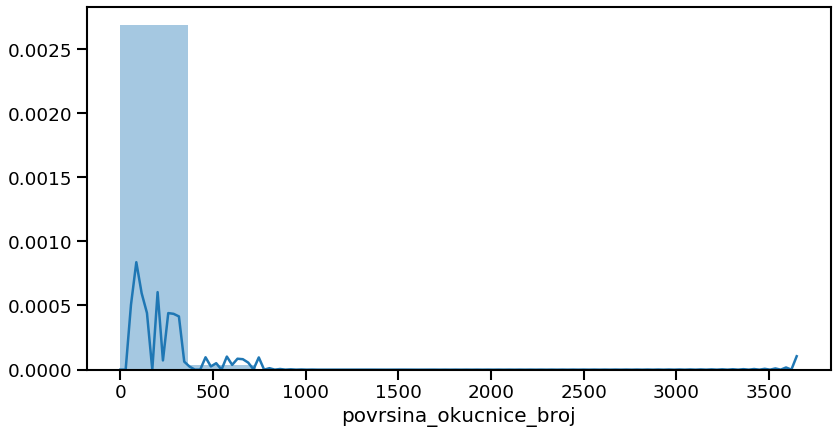

In [83]:
sns.distplot(a=kuce_df.povrsina_okucnice_broj, bins=10)

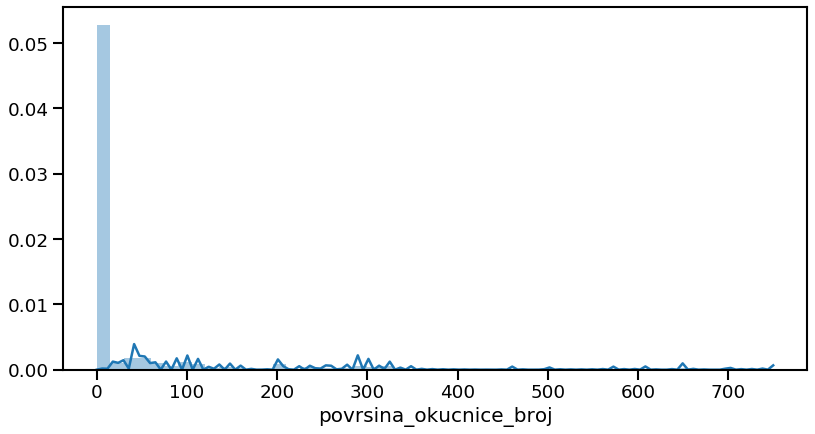

In [84]:
sns.distplot(a=kuce_df[kuce_df.povrsina_okucnice_broj < 1000].povrsina_okucnice_broj, bins=50)

In [85]:
kuce_df = kuce_df[kuce_df.povrsina_okucnice_broj < 1000]

## Lokacija

In [86]:
kuce_df.lokacija.unique()

array(['Širi centar, Pula', 'Stoja, Pula', 'Savudrija, Umag',
       'Mugeba, Poreč', 'Barbariga, Vodnjan', 'Umag', 'Funtana, Vrsar',
       'Novigrad', 'Poreč', 'Centar, Pula', 'Nova Veruda, Pula',
       'Medulin', 'Rovinj', 'Ližnjan', 'Kaštanjer, Pula',
       'Veli vrh, Pula', 'Valdebek, Pula', 'Monte Zaro, Pula',
       'Monvidal, Pula', 'Štinjan, Pula', 'Banjole, Medulin',
       'Vrvari, Poreč', 'Lovrečica, Umag', 'Červar-Porat, Poreč',
       'Baderna, Poreč', 'Vabriga, Tar-Vabriga', 'Fažana',
       'Busoler, Pula', 'Peroj, Vodnjan', 'Vinkuran, Medulin',
       'Veruda, Pula', 'Veli Maj, Poreč', 'Arena, Pula', 'Vodnjan',
       'Premantura, Medulin', 'Monte Magno, Pula', 'Buje',
       'okolica Pule, Pula', 'Vižinada', 'Ilirija, Pula', 'Valica, Umag',
       'Fuškulin, Poreč', 'Valmade, Pula', 'Finida, Umag',
       'Valbandon, Fažana', 'Gregovica, Pula', 'Tar, Tar-Vabriga',
       'Pomer, Medulin', 'Kukci, Poreč', 'Rovinjsko Selo, Rovinj',
       'Kaštel, Buje', 'Radoši kod Ž

In [87]:
def replace_lokacija(row):
    if row.lokacija is not np.NaN:
        #return row.lokacija.split(',')[-1].strip()
        return row.lokacija.split(',')[-1].strip().lower()
    else:
        return np.NaN

In [88]:
from keras.utils import to_categorical

Using TensorFlow backend.


In [89]:
#list(map(lambda grad: grad.split(',')[-1].strip(), gradovi))
kuce_df['lokacija_naziv'] = kuce_df.apply(replace_lokacija, axis=1)

In [90]:
len(kuce_df.lokacija_naziv.values)

481

In [91]:
lokacija_mapping = {x: i for i,x in enumerate(kuce_df.lokacija_naziv.unique(), 0)}
len(lokacija_mapping)

19

In [92]:
print(lokacija_mapping)

{'pula': 0, 'umag': 1, 'poreč': 2, 'vodnjan': 3, 'vrsar': 4, 'novigrad': 5, 'medulin': 6, 'rovinj': 7, 'ližnjan': 8, 'tar-vabriga': 9, 'fažana': 10, 'buje': 11, 'vižinada': 12, 'labin': 13, 'brtonigla': 14, 'marčana': 15, 'višnjan': 16, 'sveti lovreč': 17, 'pazin': 18}


In [93]:
kuce_df['lokacija_naziv_broj'] = kuce_df.apply(lambda row: lokacija_mapping[row.lokacija_naziv], axis=1)

In [94]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(kuce_df[['lokacija', 'lokacija_naziv']])

                         lokacija lokacija_naziv
1               Širi centar, Pula           pula
7                     Stoja, Pula           pula
10                Savudrija, Umag           umag
17                  Mugeba, Poreč          poreč
22             Barbariga, Vodnjan        vodnjan
28             Barbariga, Vodnjan        vodnjan
30                           Umag           umag
31                 Funtana, Vrsar          vrsar
43                       Novigrad       novigrad
44                          Poreč          poreč
47                           Umag           umag
49                           Umag           umag
70                           Umag           umag
77                   Centar, Pula           pula
78              Nova Veruda, Pula           pula
82                        Medulin        medulin
86                         Rovinj         rovinj
93                        Ližnjan        ližnjan
95                        Ližnjan        ližnjan
99                Ka

In [95]:
with pd.option_context('max_colwidth', -1):
    print(kuce_df['lokacija_naziv_broj'])

1       0
7       0
10      1
17      2
22      3
       ..
3146    7
3148    0
3152    0
3158    0
3170    7
Name: lokacija_naziv_broj, Length: 481, dtype: int64


In [96]:
kuce_df.lokacija_naziv_broj.unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18])

In [97]:
to_categorical(kuce_df.lokacija_naziv_broj)

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]), <a list of 19 Text xticklabel objects>)

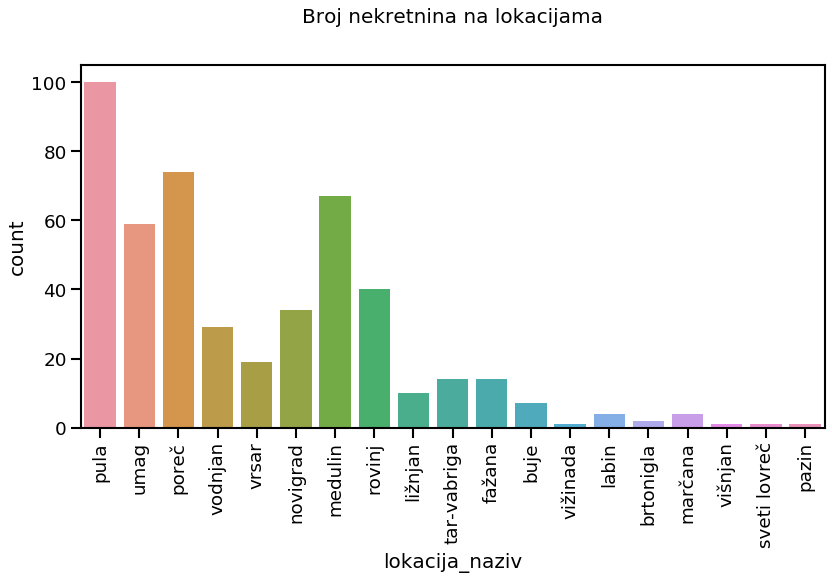

In [98]:
g = sns.countplot(x="lokacija_naziv",  data=kuce_df)
g.set_title("Broj nekretnina na lokacijama", y=1.1)
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]), <a list of 19 Text xticklabel objects>)

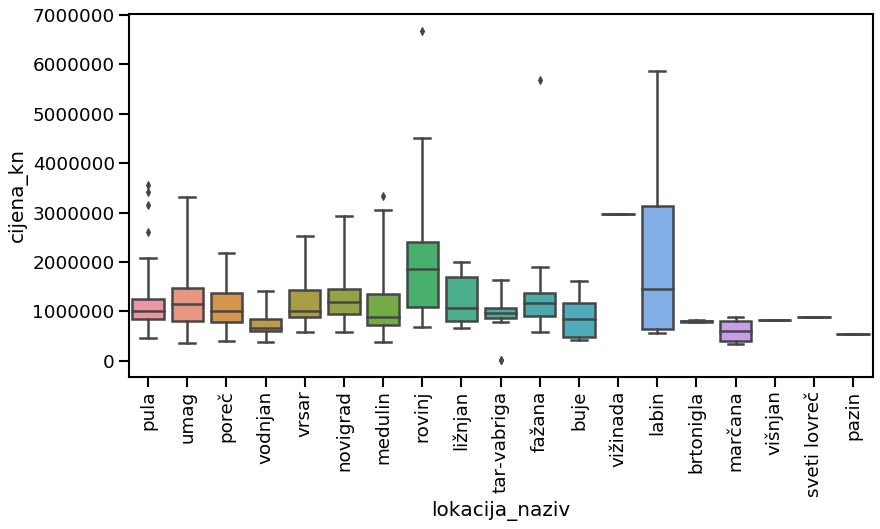

In [99]:
sns.boxplot(x='lokacija_naziv', y='cijena_kn', data=kuce_df, orient="v", whis=3.0)
g.set_title("Cijena nekretnina na lokacijama", y=1.1)
plt.xticks(rotation=90)

### To categorical

In [100]:
#grad_lokacija_df = pd.get_dummies(kuce_df['lokacija_naziv'], prefix = 'grad')
#grad_lokacija_df

In [101]:
#len(grad_lokacija_df.columns)

In [102]:
#grad_lokacija_df.columns.values.tolist()

In [103]:
#kuce_df_gradovi = pd.concat([kuce_df, grad_lokacija_df], axis=1)

In [104]:
#kuce_df_gradovi

In [105]:
#kuce_df = kuce_df_gradovi

## Stanje nekretnina

In [106]:
kuce_df = kuce_df[kuce_df.stanje_nekretnine.notnull()]

In [107]:
def stanje_nekretnine_to_categorical(row):
    if row.stanje_nekretnine == 'dovršena':
        return 0
    elif row.stanje_nekretnine == 'nedovršena':
        return 1
    else:
        return 0 # Dovršena

In [108]:
kuce_df['stanje_nekretnine_categorical'] = kuce_df.apply(stanje_nekretnine_to_categorical, axis=1)
kuce_df['stanje_nekretnine_categorical'] = kuce_df.stanje_nekretnine_categorical.astype('category')
kuce_df['stanje_nekretnine_categorical'] = to_categorical(kuce_df.stanje_nekretnine_categorical.values)

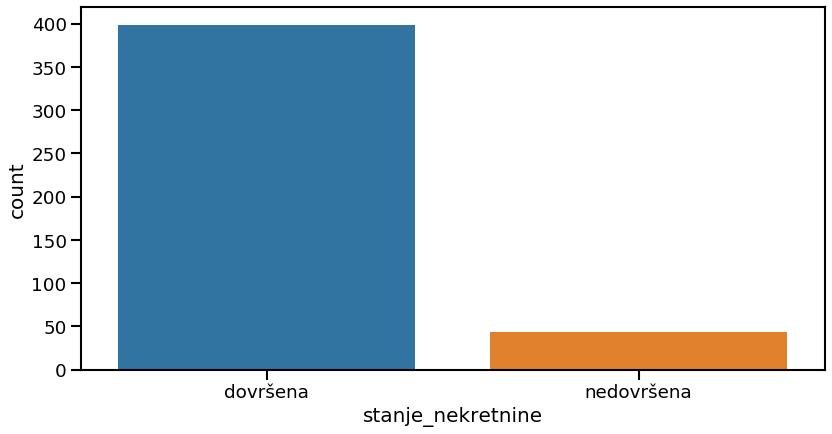

In [109]:
sns.countplot(x=kuce_df.stanje_nekretnine)

## Pogled na more

In [110]:
kuce_df = kuce_df[kuce_df.pogled_na_more.notnull()]

In [111]:
def pogled_na_more_to_categorical(row):
    if row.pogled_na_more == 'da':
        return 1
    elif row.pogled_na_more == 'ne':
        return 0
    else:
        return np.NaN # Nema

In [112]:
kuce_df['pogled_na_more_categorical'] = kuce_df.apply(pogled_na_more_to_categorical, axis=1)
kuce_df['pogled_na_more_categorical'] = kuce_df.pogled_na_more_categorical.astype('category')
kuce_df['pogled_na_more_categorical'] = to_categorical(kuce_df.pogled_na_more_categorical.values)

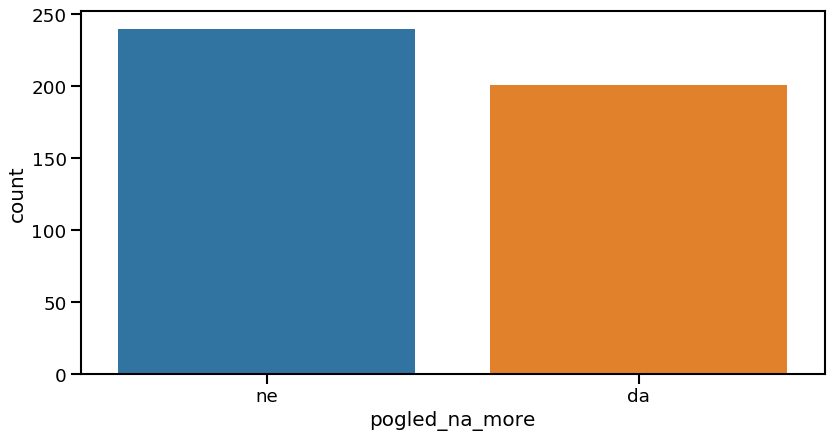

In [113]:
sns.countplot(x=kuce_df.pogled_na_more)

## Correlation

In [114]:
kuce_df.corr()

ukupan_broj_soba   toaleti  ukupno_katova  \
ukupan_broj_soba                       1.000000  0.086803      -0.073603   
toaleti                                0.086803  1.000000      -0.112430   
ukupno_katova                         -0.073603 -0.112430       1.000000   
spavace_sobe                           0.869113  0.151534      -0.071996   
kupaonice                              0.431543  0.128757      -0.043434   
cijena_kn                              0.346305  0.618737      -0.033190   
godina_izgradnje_broj                 -0.120028  0.105216      -0.181636   
povrsina_broj                          0.521697  0.431059      -0.054728   
povrsina_okucnice_broj                 0.035288  0.095604      -0.083446   
lokacija_naziv_broj                   -0.002101  0.131589      -0.035426   
stanje_nekretnine_categorical          0.081472  0.020174      -0.050353   
pogled_na_more_categorical            -0.063310 -0.128191      -0.065821   

                               spavace_sobe  kupaonice  cijena_kn  \
ukupan_broj_soba                   0.869113   0.431543   0.346305   
toaleti                            0.151534   0.128757   0.618737   
ukupno_katova                     -0.071996  -0.043434  -0.033190   
spavace_sobe                       1.000000   0.416177   0.382983   
kupaonice                          0.416177   1.000000   0.339119   
cijena_kn                          0.382983   0.339119   1.000000   
godina_izgradnje_broj             -0.072754   0.121760   0.138511   
povrsina_broj                      0.580580   0.422744   0.733315   
povrsina_okucnice_broj             0.059315   0.133667   0.053652   
lokacija_naziv_broj               -0.027763   0.121908   0.113454   
stanje_nekretnine_categorical      0.066620   0.121385   0.017841   
pogled_na_more_categorical        -0.069229  -0.134736  -0.238392   

                               godina_izgradnje_broj  povrsina_broj  \
ukupan_broj_soba                           -0.120028       0.521697   
toaleti                                     0.105216       0.431059   
ukupno_katova                              -0.181636      -0.054728   
spavace_sobe                               -0.072754       0.580580   
kupaonice                                   0.121760       0.422744   
cijena_kn                                   0.138511       0.733315   
godina_izgradnje_broj                       1.000000       0.058701   
povrsina_broj                               0.058701       1.000000   
povrsina_okucnice_broj                      0.085570       0.117323   
lokacija_naziv_broj                         0.147175       0.093343   
stanje_nekretnine_categorical              -0.102083       0.056085   
pogled_na_more_categorical                 -0.226802      -0.106358   

                               povrsina_okucnice_broj  lokacija_naziv_broj  \
ukupan_broj_soba                             0.035288            -0.002101   
toaleti                                      0.095604             0.131589   
ukupno_katova                               -0.083446            -0.035426   
spavace_sobe                                 0.059315            -0.027763   
kupaonice                                    0.133667             0.121908   
cijena_kn                                    0.053652             0.113454   
godina_izgradnje_broj                        0.085570             0.147175   
povrsina_broj                                0.117323             0.093343   
povrsina_okucnice_broj                       1.000000            -0.001323   
lokacija_naziv_broj                         -0.001323             1.000000   
stanje_nekretnine_categorical                0.040159            -0.065369   
pogled_na_more_categorical                   0.079746            -0.113500   

                               stanje_nekretnine_categorical  \
ukupan_broj_soba                                    0.081472   
toaleti                                             0.020174   
ukupno_katova

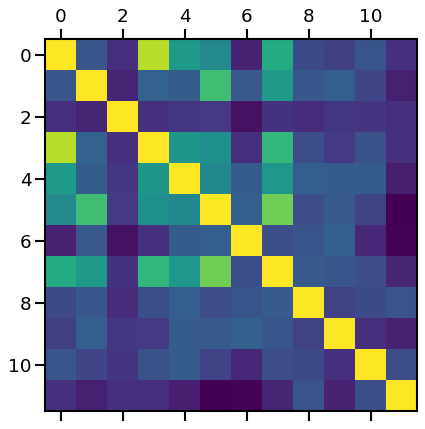

In [115]:
plt.matshow(kuce_df.corr())
plt.show()

In [116]:
def plot_corr(df,size=10):
    '''Function plots a graphical correlation matrix for each pair of columns in the dataframe.

    Input:
        df: pandas DataFrame
        size: vertical and horizontal size of the plot'''

    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns);
    plt.yticks(range(len(corr.columns)), corr.columns);

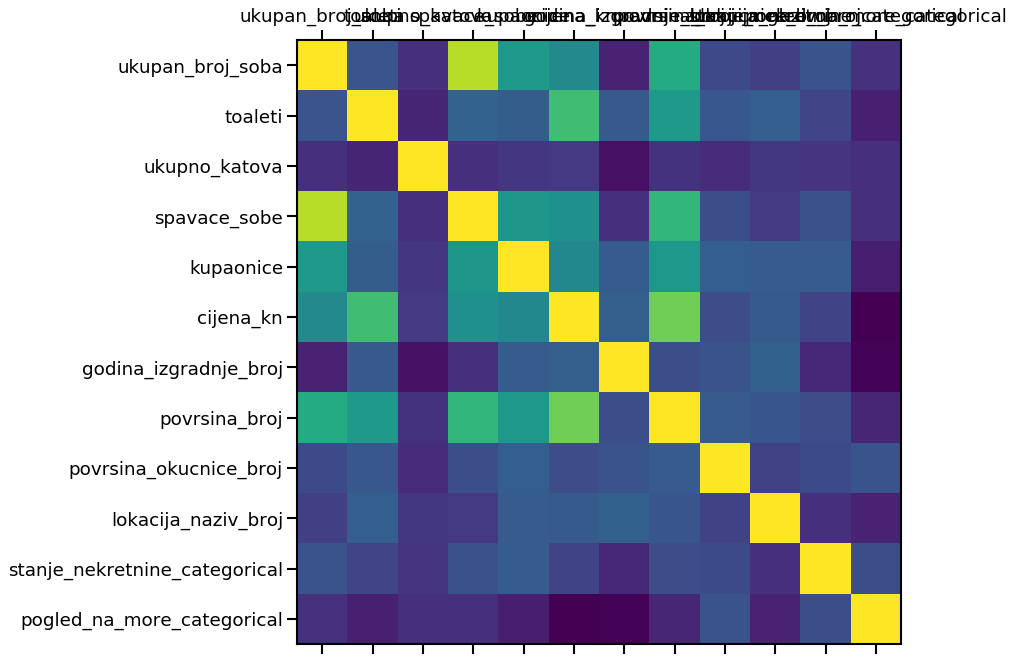

In [117]:
plot_corr(kuce_df)

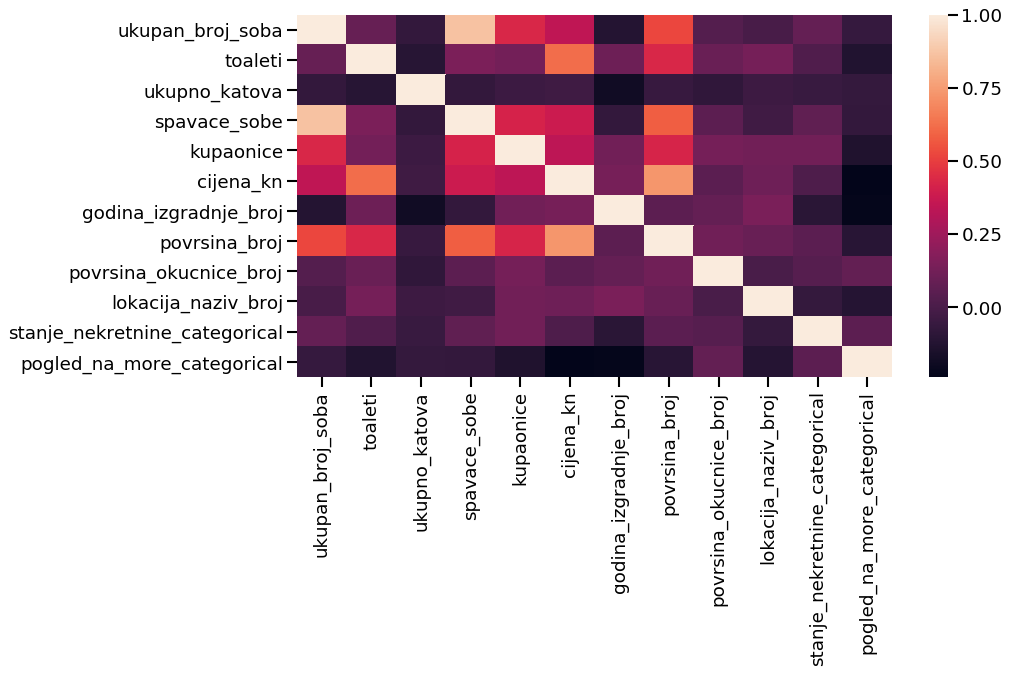

In [118]:
corr = kuce_df.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In [119]:
kuce_df.corrwith(kuce_df.cijena_kn)

ukupan_broj_soba                 0.346305
toaleti                          0.618737
ukupno_katova                   -0.033190
spavace_sobe                     0.382983
kupaonice                        0.339119
cijena_kn                        1.000000
godina_izgradnje_broj            0.138511
povrsina_broj                    0.733315
povrsina_okucnice_broj           0.053652
lokacija_naziv_broj              0.113454
stanje_nekretnine_categorical    0.017841
pogled_na_more_categorical      -0.238392
dtype: float64

In [120]:
import plotly.express as px

fig = px.scatter_3d(kuce_df, x='cijena_kn', y='godina_izgradnje_broj', z='povrsina_broj', color='ukupno_katova')
fig.show()

## Data for training

In [121]:
kuce_df[['lokacija_naziv', 'ukupan_broj_soba', 'toaleti', 'ukupno_katova', 'spavace_sobe', 'godina_izgradnje_broj', 'povrsina_broj', 'stanje_nekretnine_categorical', 'pogled_na_more_categorical']]

lokacija_naziv  ukupan_broj_soba  toaleti  ukupno_katova  spavace_sobe  \
1              pula               3.0      1.0            1.0           1.0   
7              pula               2.0      NaN            4.0           1.0   
10             umag               4.0      NaN            2.0           2.0   
17            poreč               3.0      NaN            3.0           2.0   
22          vodnjan               2.0      NaN            1.0           1.0   
...             ...               ...      ...            ...           ...   
2765          poreč               3.0      NaN            3.0           2.0   
2868          vrsar               4.0      NaN            3.0           3.0   
2937           pula               3.0      NaN            4.0           2.0   
3062          poreč               4.0      NaN            2.0           3.0   
3097        ližnjan               2.0      1.0            3.0           1.0   

      godina_izgradnje_broj  povrsina_broj  stanje_nekretnine_categorical  \
1                    1900.0          58.70                            1.0   
7                    1985.0          54.00                            1.0   
10                   2004.0          76.78                            1.0   
17                   2004.0          59.36                            1.0   
22                   2019.0          44.00                            1.0   
...                     ...            ...                            ...   
2765                 2005.0          56.00                            1.0   
2868                 2014.0          86.00                            1.0   
2937                 1850.0          73.40                            1.0   
3062                 1999.0         109.00                            1.0   
3097                 2011.0          76.14                            1.0   

      pogled_na_more_categorical  
1                            1.0  
7                            0.0  
10                           0.0  
17                           0.0  
22                           0.0  
...                          ...  
2765                         1.0  
2868                         0.0  
2937                         1.0  
3062                         0.0  
3097                         0.0  

[441 rows x 9 columns]

In [122]:
stanovi_kuce_df = kuce_df

In [123]:
len(stanovi_kuce_df)

441

In [124]:
stanovi_kuce_df_not_nan = stanovi_kuce_df.copy()

In [125]:
len(stanovi_kuce_df_not_nan[stanovi_kuce_df_not_nan.ukupan_broj_soba.notnull()])

441

In [126]:
len(stanovi_kuce_df_not_nan[stanovi_kuce_df_not_nan.toaleti.notnull()])

66

In [127]:
len(stanovi_kuce_df_not_nan[stanovi_kuce_df_not_nan.ukupno_katova.notnull()])

441

In [128]:
len(stanovi_kuce_df_not_nan[stanovi_kuce_df_not_nan.spavace_sobe.notnull()])

439

In [129]:
len(stanovi_kuce_df_not_nan[stanovi_kuce_df_not_nan.kupaonice.notnull()])

259

In [130]:
len(stanovi_kuce_df_not_nan[stanovi_kuce_df_not_nan.godina_izgradnje_broj.notnull()])

441

In [131]:
len(stanovi_kuce_df_not_nan[stanovi_kuce_df_not_nan.povrsina_broj.notnull()])

441

In [132]:
len(stanovi_kuce_df_not_nan[stanovi_kuce_df_not_nan.cijena_kn.notnull()])

434

In [133]:
len(stanovi_kuce_df_not_nan[stanovi_kuce_df_not_nan.stanje_nekretnine.notnull()])

441

In [134]:
len(stanovi_kuce_df_not_nan[stanovi_kuce_df_not_nan.pogled_na_more_categorical.notnull()])

441

In [135]:
stanovi_kuce_df_not_nan.toaleti.describe()

count    66.000000
mean      1.121212
std       0.447735
min       1.000000
25%       1.000000
50%       1.000000
75%       1.000000
max       4.000000
Name: toaleti, dtype: float64

In [136]:
#stanovi_kuce_df_not_nan = stanovi_kuce_df_not_nan.toaleti.fillna(1)
#stanovi_kuce_df_not_nan = stanovi_kuce_df_not_nan.fillna({'toaleti': 1.0})
stanovi_kuce_df_not_nan = stanovi_kuce_df_not_nan.fillna({'kupaonice': 1.0})

In [137]:
stanovi_kuce_df_not_nan = stanovi_kuce_df_not_nan.fillna({'povrsina_okucnice_broj': 0.0})

In [138]:
#stanovi_kuce_df_not_nan = stanovi_kuce_df.copy()
stanovi_kuce_df_not_nan = stanovi_kuce_df_not_nan[stanovi_kuce_df_not_nan.ukupan_broj_soba.notnull()]
#stanovi_kuce_df_not_nan = stanovi_kuce_df_not_nan[stanovi_kuce_df_not_nan.toaleti.notnull()]
stanovi_kuce_df_not_nan = stanovi_kuce_df_not_nan[stanovi_kuce_df_not_nan.ukupno_katova.notnull()]
stanovi_kuce_df_not_nan = stanovi_kuce_df_not_nan[stanovi_kuce_df_not_nan.spavace_sobe.notnull()]
stanovi_kuce_df_not_nan = stanovi_kuce_df_not_nan[stanovi_kuce_df_not_nan.kupaonice.notnull()]
stanovi_kuce_df_not_nan = stanovi_kuce_df_not_nan[stanovi_kuce_df_not_nan.godina_izgradnje_broj.notnull()]
stanovi_kuce_df_not_nan = stanovi_kuce_df_not_nan[stanovi_kuce_df_not_nan.povrsina_broj.notnull()]
stanovi_kuce_df_not_nan = stanovi_kuce_df_not_nan[stanovi_kuce_df_not_nan.cijena_kn.notnull()]
stanovi_kuce_df_not_nan = stanovi_kuce_df_not_nan[stanovi_kuce_df_not_nan.lokacija_naziv.notnull()]
stanovi_kuce_df_not_nan = stanovi_kuce_df_not_nan[stanovi_kuce_df_not_nan.stanje_nekretnine.notnull()]
stanovi_kuce_df_not_nan = stanovi_kuce_df_not_nan[stanovi_kuce_df_not_nan.pogled_na_more_categorical.notnull()]

In [139]:
len(stanovi_kuce_df_not_nan)

432

In [140]:
stanovi_kuce_df_not_nan.drop(stanovi_kuce_df_not_nan.loc[stanovi_kuce_df_not_nan['url']=='http://www.remax-svijetnekretnina.com/stan/prilika-tarstan-u-prizemlju-sa-vlastitim-vrtom'].index, inplace=True)
stanovi_kuce_df_not_nan.drop(stanovi_kuce_df_not_nan.loc[stanovi_kuce_df_not_nan['url']=='http://www.remax-svijetnekretnina.com/stan/prilika-taristramoderni-komforni-stanovi'].index, inplace=True)

## Normalize values

In [141]:
def normalize(df, columns):
    result = df.copy()
    for feature_name in filter(lambda column: column in columns, df.columns):
        max_value = df[feature_name].max()
        min_value = df[feature_name].min()
        result[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
    return result

# Keras

In [142]:
# Keras imports
from keras.models import Sequential
from keras.layers import Dense

# Additional stuff
from keras import layers
from keras import losses
from keras import optimizers
from keras import utils

#from keras.utils import plot_model
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

# More advanced stuff
#import tensorflow.keras.backend as K
#from keras.layers.advanced_activations import LeakyReLU
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

In [143]:
model_input = stanovi_kuce_df_not_nan[['lokacija_naziv_broj',
 'stanje_nekretnine_categorical', 
 'pogled_na_more_categorical', 
 'ukupan_broj_soba', 
 'ukupno_katova', 
 'spavace_sobe', 
 'kupaonice', 
 'godina_izgradnje_broj', 
 'povrsina_broj', 
 'povrsina_okucnice_broj']]
model_output = stanovi_kuce_df_not_nan.cijena_kn.values

In [144]:
model_input

lokacija_naziv_broj  stanje_nekretnine_categorical  \
1                       0                            1.0   
7                       0                            1.0   
10                      1                            1.0   
17                      2                            1.0   
22                      3                            1.0   
...                   ...                            ...   
2765                    2                            1.0   
2868                    4                            1.0   
2937                    0                            1.0   
3062                    2                            1.0   
3097                    8                            1.0   

      pogled_na_more_categorical  ukupan_broj_soba  ukupno_katova  \
1                            1.0               3.0            1.0   
7                            0.0               2.0            4.0   
10                           0.0               4.0            2.0   
17                           0.0               3.0            3.0   
22                           0.0               2.0            1.0   
...                          ...               ...            ...   
2765                         1.0               3.0            3.0   
2868                         0.0               4.0            3.0   
2937                         1.0               3.0            4.0   
3062                         0.0               4.0            2.0   
3097                         0.0               2.0            3.0   

      spavace_sobe  kupaonice  godina_izgradnje_broj  povrsina_broj  \
1              1.0        1.0                 1900.0          58.70   
7              1.0        1.0                 1985.0          54.00   
10             2.0        2.0                 2004.0          76.78   
17             2.0        1.0                 2004.0          59.36   
22             1.0        1.0                 2019.0          44.00   
...            ...        ...                    ...            ...   
2765           2.0        1.0                 2005.0          56.00   
2868           3.0        2.0                 2014.0          86.00   
2937           2.0        1.0                 1850.0          73.40   
3062           3.0        2.0                 1999.0         109.00   
3097           1.0        1.0                 2011.0          76.14   

      povrsina_okucnice_broj  
1                      200.0  
7                        0.0  
10                       0.0  
17                       0.0  
22                       0.0  
...                      ...  
2765                     0.0  
2868                     0.0  
2937                     0.0  
3062                     0.0  
3097                    13.0  

[430 rows x 10 columns]

W1204 09:58:54.098356 140183731218240 deprecation_wrapper.py:119] From /home/ksaric/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W1204 09:58:54.112600 140183731218240 deprecation_wrapper.py:119] From /home/ksaric/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W1204 09:58:54.114633 140183731218240 deprecation_wrapper.py:119] From /home/ksaric/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W1204 09:58:54.132171 140183731218240 deprecation_wrapper.py:119] From /home/ksaric/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placehold

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_to_hidden (Dense)      (None, 180)               1980      
_________________________________________________________________
hidden_to_hidden (Dense)     (None, 180)               32580     
_________________________________________________________________
dropout_1 (Dropout)          (None, 180)               0         
_________________________________________________________________
hidden_to_output (Dense)     (None, 1)                 181       
Total params: 34,741
Trainable params: 34,741
Non-trainable params: 0
_________________________________________________________________


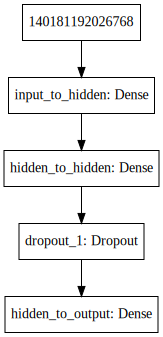

In [145]:
# Create a Sequential model
model = Sequential()

#hidden_layers = 4
#hidden_layers = 22
#hidden_layers = 250
hidden_layers = 180


# Add an input layer and a hidden layer
#model.add((LeakyReLU(alpha=0.1)))
model.add(Dense(hidden_layers, input_shape=(10,), activation='relu', name='input_to_hidden'))

#model.add(layers.Dropout(0.5))

# Add another hidden layer
model.add(Dense(hidden_layers, input_shape=(hidden_layers,), activation='relu', name='hidden_to_hidden'))

model.add(layers.Dropout(0.5))

# Add another hidden layer
#model.add(Dense(hidden_layers, input_shape=(hidden_layers,), activation='relu', name='hidden_to_hidden2'))

#model.add(layers.Dropout(0.5))

# Add a 1-neuron output layer
model.add(Dense(1, input_shape=(hidden_layers,), name='hidden_to_output'))

# Summarise your model
model.summary()

#plot_model(model, to_file='model.png')
SVG(model_to_dot(model).create(prog='dot', format='svg'))

In [146]:
callbacks = [
    EarlyStopping(monitor='val_loss', patience=20, verbose=1),
    ReduceLROnPlateau(factor=0.1, patience=10, min_lr=0.000001, verbose=1),
    ModelCheckpoint('house_price_model_best.h5', verbose=0, save_best_only=True, save_weights_only=True)
]

In [147]:
# Optimizer
optimizer=optimizers.Adam()

# Compile your model
model.compile(optimizer=optimizer, loss=losses.mean_squared_error, metrics=['mean_absolute_error','mean_squared_error', 'mean_squared_logarithmic_error'])


# Fit your model on your data for 5 epochs
history_dict = model.fit(model_input, model_output, validation_split=0.33, epochs=1500, batch_size=100, callbacks=callbacks, verbose=1) 

# Evaluate your model
print("Final loss:", model.evaluate(model_input, model_output))

W1204 09:58:54.223936 140183731218240 deprecation_wrapper.py:119] From /home/ksaric/anaconda3/lib/python3.7/site-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W1204 09:58:54.240004 140183731218240 deprecation_wrapper.py:119] From /home/ksaric/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:1521: The name tf.log is deprecated. Please use tf.math.log instead.



Train on 288 samples, validate on 142 samples
Epoch 1/1500
288/288 [==============================] - 2s 5ms/step - loss: 1955709505080.8889 - mean_absolute_error: 1176404.1840 - mean_squared_error: 1955709505080.8889 - mean_squared_logarithmic_error: 102.7406 - val_loss: 2239312262908.3945 - val_mean_absolute_error: 1303954.6215 - val_mean_squared_error: 2239312262908.3945 - val_mean_squared_logarithmic_error: 62.1463
Epoch 2/1500
288/288 [==============================] - 0s 35us/step - loss: 1954700986140.4446 - mean_absolute_error: 1175971.4896 - mean_squared_error: 1954700986140.4446 - mean_squared_logarithmic_error: 58.1637 - val_loss: 2238228489461.1831 - val_mean_absolute_error: 1303540.5599 - val_mean_squared_error: 2238228489461.1831 - val_mean_squared_logarithmic_error: 52.1801
Epoch 3/1500
288/288 [==============================] - 0s 33us/step - loss: 1953689760199.1111 - mean_absolute_error: 1175564.4653 - mean_squared_error: 1953689760199.1111 - mean_squared_logarithmic_

Epoch 23/1500
288/288 [==============================] - 0s 29us/step - loss: 1898671348849.7778 - mean_absolute_error: 1152009.8750 - mean_squared_error: 1898671348849.7778 - mean_squared_logarithmic_error: 14.3180 - val_loss: 2171505619578.5916 - val_mean_absolute_error: 1277843.0933 - val_mean_squared_error: 2171505619578.5916 - val_mean_squared_logarithmic_error: 14.4623
Epoch 24/1500
288/288 [==============================] - 0s 31us/step - loss: 1891359857777.7778 - mean_absolute_error: 1148965.9878 - mean_squared_error: 1891359857777.7778 - mean_squared_logarithmic_error: 13.4677 - val_loss: 2163762904857.2393 - val_mean_absolute_error: 1274830.9525 - val_mean_squared_error: 2163762904857.2393 - val_mean_squared_logarithmic_error: 13.6628
Epoch 25/1500
288/288 [==============================] - 0s 30us/step - loss: 1883736679310.2222 - mean_absolute_error: 1145576.7917 - mean_squared_error: 1883736679310.2222 - mean_squared_logarithmic_error: 12.6321 - val_loss: 2155351523558.76

Epoch 45/1500
288/288 [==============================] - 0s 34us/step - loss: 1583343073507.5554 - mean_absolute_error: 1007374.2361 - mean_squared_error: 1583343073507.5554 - mean_squared_logarithmic_error: 3.5593 - val_loss: 1810535369655.8870 - val_mean_absolute_error: 1129078.3803 - val_mean_squared_error: 1810535369655.8870 - val_mean_squared_logarithmic_error: 3.7783
Epoch 46/1500
288/288 [==============================] - 0s 31us/step - loss: 1563200740465.7778 - mean_absolute_error: 999401.8290 - mean_squared_error: 1563200740465.7778 - mean_squared_logarithmic_error: 3.3766 - val_loss: 1783220319304.1130 - val_mean_absolute_error: 1117025.6602 - val_mean_squared_error: 1783220319304.1130 - val_mean_squared_logarithmic_error: 3.5318
Epoch 47/1500
288/288 [==============================] - 0s 33us/step - loss: 1542032368526.2222 - mean_absolute_error: 987030.7413 - mean_squared_error: 1542032368526.2222 - mean_squared_logarithmic_error: 3.1547 - val_loss: 1754893529722.5916 - va

Epoch 67/1500
288/288 [==============================] - 0s 28us/step - loss: 952022533916.4445 - mean_absolute_error: 641536.4931 - mean_squared_error: 952022533916.4445 - mean_squared_logarithmic_error: 0.6342 - val_loss: 1080859502505.4648 - val_mean_absolute_error: 752180.8996 - val_mean_squared_error: 1080859502505.4648 - val_mean_squared_logarithmic_error: 0.7426
Epoch 68/1500
288/288 [==============================] - 0s 33us/step - loss: 947562617969.7777 - mean_absolute_error: 627231.3342 - mean_squared_error: 947562617969.7777 - mean_squared_logarithmic_error: 0.6154 - val_loss: 1047424792777.9155 - val_mean_absolute_error: 731579.0379 - val_mean_squared_error: 1047424792777.9155 - val_mean_squared_logarithmic_error: 0.6872
Epoch 69/1500
288/288 [==============================] - 0s 28us/step - loss: 897513435591.1111 - mean_absolute_error: 599782.6901 - mean_squared_error: 897513435591.1111 - mean_squared_logarithmic_error: 0.5441 - val_loss: 1015002582866.9296 - val_mean_ab

288/288 [==============================] - 0s 31us/step - loss: 611155336305.7777 - mean_absolute_error: 441883.9826 - mean_squared_error: 611155336305.7777 - mean_squared_logarithmic_error: 0.2284 - val_loss: 603100347492.9578 - val_mean_absolute_error: 494787.7958 - val_mean_squared_error: 603100347492.9578 - val_mean_squared_logarithmic_error: 0.2355
Epoch 90/1500
288/288 [==============================] - 0s 34us/step - loss: 559859405255.1111 - mean_absolute_error: 432116.5065 - mean_squared_error: 559859405255.1111 - mean_squared_logarithmic_error: 0.2112 - val_loss: 594423063566.4225 - val_mean_absolute_error: 493153.4023 - val_mean_squared_error: 594423063566.4225 - val_mean_squared_logarithmic_error: 0.2318
Epoch 91/1500
288/288 [==============================] - 0s 33us/step - loss: 583185400263.1111 - mean_absolute_error: 441982.1016 - mean_squared_error: 583185400263.1111 - mean_squared_logarithmic_error: 0.2246 - val_loss: 586850485839.3240 - val_mean_absolute_error: 49179

288/288 [==============================] - 0s 38us/step - loss: 564000676522.6666 - mean_absolute_error: 456281.4492 - mean_squared_error: 564000676522.6666 - mean_squared_logarithmic_error: 0.2279 - val_loss: 534949311560.1127 - val_mean_absolute_error: 482351.2738 - val_mean_squared_error: 534949311560.1127 - val_mean_squared_logarithmic_error: 0.2172
Epoch 112/1500
288/288 [==============================] - 0s 39us/step - loss: 569743795086.2223 - mean_absolute_error: 461432.6016 - mean_squared_error: 569743795086.2223 - mean_squared_logarithmic_error: 0.2348 - val_loss: 534549508730.5916 - val_mean_absolute_error: 482272.2764 - val_mean_squared_error: 534549508730.5916 - val_mean_squared_logarithmic_error: 0.2172
Epoch 113/1500
288/288 [==============================] - 0s 41us/step - loss: 572437121251.5555 - mean_absolute_error: 466290.5734 - mean_squared_error: 572437121251.5555 - mean_squared_logarithmic_error: 0.2305 - val_loss: 534230258875.4930 - val_mean_absolute_error: 482

288/288 [==============================] - 0s 33us/step - loss: 569112863175.1111 - mean_absolute_error: 467455.3099 - mean_squared_error: 569112863175.1111 - mean_squared_logarithmic_error: 0.2400 - val_loss: 530782970202.1409 - val_mean_absolute_error: 481160.9780 - val_mean_squared_error: 530782970202.1409 - val_mean_squared_logarithmic_error: 0.2163
Epoch 134/1500
288/288 [==============================] - 0s 33us/step - loss: 551431797873.7777 - mean_absolute_error: 470833.8320 - mean_squared_error: 551431797873.7777 - mean_squared_logarithmic_error: 0.2340 - val_loss: 530656213424.6760 - val_mean_absolute_error: 481112.4137 - val_mean_squared_error: 530656213424.6760 - val_mean_squared_logarithmic_error: 0.2162
Epoch 135/1500
288/288 [==============================] - 0s 31us/step - loss: 572267433073.7777 - mean_absolute_error: 469562.1107 - mean_squared_error: 572267433073.7777 - mean_squared_logarithmic_error: 0.2425 - val_loss: 530514811658.8170 - val_mean_absolute_error: 481

288/288 [==============================] - 0s 33us/step - loss: 544504066048.0000 - mean_absolute_error: 452935.6497 - mean_squared_error: 544504066048.0000 - mean_squared_logarithmic_error: 0.2160 - val_loss: 528406417004.1690 - val_mean_absolute_error: 480143.5440 - val_mean_squared_error: 528406417004.1690 - val_mean_squared_logarithmic_error: 0.2152
Epoch 156/1500
288/288 [==============================] - 0s 35us/step - loss: 558751008540.4445 - mean_absolute_error: 455098.2674 - mean_squared_error: 558751008540.4445 - mean_squared_logarithmic_error: 0.2325 - val_loss: 528163177832.5634 - val_mean_absolute_error: 480079.4569 - val_mean_squared_error: 528163177832.5634 - val_mean_squared_logarithmic_error: 0.2151
Epoch 157/1500
288/288 [==============================] - 0s 33us/step - loss: 571268547470.2223 - mean_absolute_error: 464808.8932 - mean_squared_error: 571268547470.2223 - mean_squared_logarithmic_error: 0.2370 - val_loss: 527938615497.9155 - val_mean_absolute_error: 480

288/288 [==============================] - 0s 36us/step - loss: 542500541326.2222 - mean_absolute_error: 456809.4462 - mean_squared_error: 542500541326.2222 - mean_squared_logarithmic_error: 0.2206 - val_loss: 524717274645.6338 - val_mean_absolute_error: 478954.8345 - val_mean_squared_error: 524717274645.6338 - val_mean_squared_logarithmic_error: 0.2141
Epoch 178/1500
288/288 [==============================] - 0s 32us/step - loss: 566547292387.5555 - mean_absolute_error: 461863.5543 - mean_squared_error: 566547292387.5555 - mean_squared_logarithmic_error: 0.2327 - val_loss: 524445758074.5916 - val_mean_absolute_error: 478892.7579 - val_mean_squared_error: 524445758074.5916 - val_mean_squared_logarithmic_error: 0.2141
Epoch 179/1500
288/288 [==============================] - 0s 33us/step - loss: 551950335089.7777 - mean_absolute_error: 460110.1949 - mean_squared_error: 551950335089.7777 - mean_squared_logarithmic_error: 0.2294 - val_loss: 524296915665.1268 - val_mean_absolute_error: 478

288/288 [==============================] - 0s 34us/step - loss: 570391430940.4445 - mean_absolute_error: 466162.5308 - mean_squared_error: 570391430940.4445 - mean_squared_logarithmic_error: 0.2333 - val_loss: 523788673831.6620 - val_mean_absolute_error: 478047.8565 - val_mean_squared_error: 523788673831.6620 - val_mean_squared_logarithmic_error: 0.2129

Epoch 00199: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
Epoch 200/1500
288/288 [==============================] - 0s 31us/step - loss: 535756720810.6667 - mean_absolute_error: 445253.0148 - mean_squared_error: 535756720810.6667 - mean_squared_logarithmic_error: 0.2194 - val_loss: 523769911151.7747 - val_mean_absolute_error: 478042.1241 - val_mean_squared_error: 523769911151.7747 - val_mean_squared_logarithmic_error: 0.2129
Epoch 201/1500
288/288 [==============================] - 0s 36us/step - loss: 541359550464.0000 - mean_absolute_error: 455378.4792 - mean_squared_error: 541359550464.0000 - mean_squared_loga

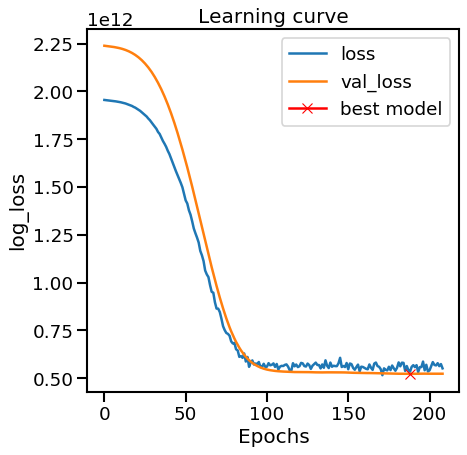

In [148]:
plt.figure(figsize=(6, 6))
plt.title("Learning curve")
plt.plot(history_dict.history["loss"], label="loss")
plt.plot(history_dict.history["val_loss"], label="val_loss")
plt.plot(np.argmin(history_dict.history["val_loss"]), np.min(history_dict.history["val_loss"]), marker="x", color="r", label="best model")
plt.xlabel("Epochs")
plt.ylabel("log_loss")
plt.legend();

* https://en.m.wikipedia.org/wiki/Mean_squared_error
* https://en.wikipedia.org/wiki/Mean_absolute_error

In [149]:
print("{:,} kn".format(round(float(np.min(history_dict.history["mean_absolute_error"])))))
print("{:,}".format(float(np.exp(np.min(history_dict.history["val_mean_squared_logarithmic_error"])))))

431,177 kn
1.2371603999930323


In [175]:
stanovi_kuce_df_not_nan.cijena_kn.describe()

count    4.300000e+02
mean     1.218769e+06
std      7.522609e+05
min      3.341620e+05
25%      7.797110e+05
50%      1.022580e+06
75%      1.410906e+06
max      6.683241e+06
Name: cijena_kn, dtype: float64

In [176]:
stanovi_kuce_df_not_nan.cijena_kn.mean()

1218768.746511628

In [151]:
print(float(np.min(history_dict.history["mean_absolute_error"])) / stanovi_kuce_df_not_nan.cijena_kn.mean() * 100," %")

35.37805511123933  %


## Prediction of the price?!

In [152]:
def calculate_house_price(features):
    
    all_features = [
          features['lokacija_naziv_broj']
        , features['stanje_nekretnine_categorical']
        , features['pogled_na_more_categorical']
        , features['ukupan_broj_soba']
        , features['ukupno_katova']
        , features['spavace_sobe']
        , features['kupaonice']
        , features['godina_izgradnje_broj']
        , features['povrsina_broj']
        , features['povrsina_okucnice_broj']
    ]
    
    X = np.array(all_features).reshape((1, 10))
    
    amount_kn = model.predict(X)
    
    
    return amount_kn

In [153]:
norm_price = calculate_house_price({
    'lokacija_naziv_broj':3,
    'stanje_nekretnine_categorical':1,
    'pogled_na_more_categorical':0,
    'ukupan_broj_soba':4,
    'kupaonice':4,
    'ukupno_katova':2,
    'spavace_sobe':2,
    'godina_izgradnje_broj':2000,
    'povrsina_broj':150,
    'povrsina_okucnice_broj':10
})
print("{:,} kn".format(round(float(norm_price))))

1,213,048 kn


## Highest miss

In [154]:
highest_miss = []

def find_worst_performing_objects(row):
    predicted_price = model.predict(np.array([row.lokacija_naziv_broj, row.stanje_nekretnine_categorical, row.pogled_na_more_categorical, row.ukupan_broj_soba, row.ukupno_katova, row.spavace_sobe, row.kupaonice, row.godina_izgradnje_broj, row.povrsina_broj, row.povrsina_okucnice_broj]).reshape((1, 10)))[0][0]
    #miss = np.abs(predicted_price - row.cijena_kn)
    miss = predicted_price - row.cijena_kn
    highest_miss.append({'location':row.url, 'cijena':row.cijena_kn, 'cijena_pred':predicted_price, 'miss':miss})

In [155]:
stanovi_kuce_df_not_nan.apply(find_worst_performing_objects, axis=1)

1       None
7       None
10      None
17      None
22      None
        ... 
2765    None
2868    None
2937    None
3062    None
3097    None
Length: 430, dtype: object

In [156]:
highest_miss

[{'location': 'http://www.remax-svijetnekretnina.com/stan/istrapula-siri-centar-stan-u-staroj-zgradi-visoko-prizemlje',
  'cijena': 519808.0,
  'cijena_pred': 1175612.9,
  'miss': 655804.875},
 {'location': 'http://www.remax-svijetnekretnina.com/stan/istra-pula-stoja-predivan-stan-54m2',
  'cijena': 1151003.0,
  'cijena_pred': 1122338.8,
  'miss': -28664.25},
 {'location': 'http://www.remax-svijetnekretnina.com/stan/istra-savudrija-stan-na-dvije-etaze-nedaleko-od-mora-i-plaza',
  'cijena': 1819327.0,
  'cijena_pred': 1152194.4,
  'miss': -667132.625},
 {'location': 'http://www.remax-svijetnekretnina.com/stan/istra-porec-dvosoban-stan-sa-pogledom-na-more-u-mugebi',
  'cijena': 853970.0,
  'cijena_pred': 1138793.8,
  'miss': 284823.75},
 {'location': 'http://www.remax-svijetnekretnina.com/stan/istra-barbariga-stan-u-novogradnji-sa-velikom-terasom-i-pogledom-na-more',
  'cijena': 668324.0,
  'cijena_pred': 1133823.9,
  'miss': 465499.875},
 {'location': 'http://www.remax-svijetnekretnina.

In [157]:
from operator import itemgetter
highest_miss_sorted = sorted(highest_miss, key=itemgetter('miss'), reverse=True) 

In [158]:
highest_miss_sorted[:500]

[{'location': 'http://www.remax-svijetnekretnina.com/stan/istraistramarcana-stan-3548m2-i-vrt-258m2',
  'cijena': 334162.0,
  'cijena_pred': 1244633.8,
  'miss': 910471.75},
 {'location': 'http://www.remax-svijetnekretnina.com/stan/istra-okolica-pule-barbariga-zgodan-apartman-na-1-katu-novije-zgrade',
  'cijena': 452975.0,
  'cijena_pred': 1234866.5,
  'miss': 781891.5},
 {'location': 'http://www.remax-svijetnekretnina.com/stan/stan-u-medulinu-26m2',
  'cijena': 371291.0,
  'cijena_pred': 1115962.6,
  'miss': 744671.625},
 {'location': 'http://www.remax-svijetnekretnina.com/apartman/istra-barbariga-apartman-sa-velikom-terasom',
  'cijena': 385400.0,
  'cijena_pred': 1105896.5,
  'miss': 720496.5},
 {'location': 'http://www.remax-svijetnekretnina.com/stan/prekrasan-dvosobni-stan-u-mirnoj-ulici-blizu-centra-medulina',
  'cijena': 559164.0,
  'cijena_pred': 1277135.9,
  'miss': 717971.875},
 {'location': 'http://www.remax-svijetnekretnina.com/stan/duga-uvala-predivan-apartman-sa-odvojenom

In [161]:
highest_miss_df = pd.DataFrame.from_dict(highest_miss_sorted)
highest_miss_df['abs_miss'] = highest_miss_df.apply(lambda row: np.abs(row.miss), axis=1)
highest_miss_df

location     cijena  \
0    http://www.remax-svijetnekretnina.com/stan/ist...   334162.0   
1    http://www.remax-svijetnekretnina.com/stan/ist...   452975.0   
2    http://www.remax-svijetnekretnina.com/stan/sta...   371291.0   
3    http://www.remax-svijetnekretnina.com/apartman...   385400.0   
4    http://www.remax-svijetnekretnina.com/stan/pre...   559164.0   
..                                                 ...        ...   
425  http://www.remax-svijetnekretnina.com/stan/ist...  4507475.0   
426  http://www.remax-svijetnekretnina.com/stan/ist...  4514900.0   
427  http://www.remax-svijetnekretnina.com/stan/ist...  5691893.0   
428  http://www.remax-svijetnekretnina.com/stan/zgr...  5866400.0   
429  http://www.remax-svijetnekretnina.com/stan/ist...  6683241.0   

     cijena_pred         miss     abs_miss  
0    1244633.750   910471.750   910471.750  
1    1234866.500   781891.500   781891.500  
2    1115962.625   744671.625   744671.625  
3    1105896.500   720496.500   720496.500  
4    1277135.875   717971.875   717971.875  
..           ...          ...          ...  
425  1232712.250 -3274762.750  3274762.750  
426  1233472.625 -3281427.375  3281427.375  
427  1274388.250 -4417504.750  4417504.750  
428  1405853.125 -4460546.875  4460546.875  
429  1352457.250 -5330783.750  5330783.750  

[430 rows x 5 columns]

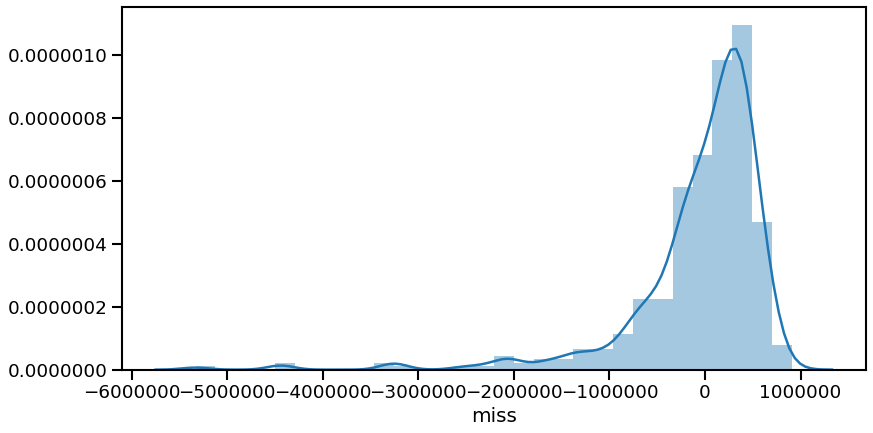

In [160]:
sns.distplot(a=highest_miss_df.miss, bins=30)

# FIN!

In [162]:
len(highest_miss_df)

430

In [174]:
highest_miss_df.nlargest(50, 'abs_miss').abs_miss.sum() / len(highest_miss_df)

183586.81627906975

## Demonstracija

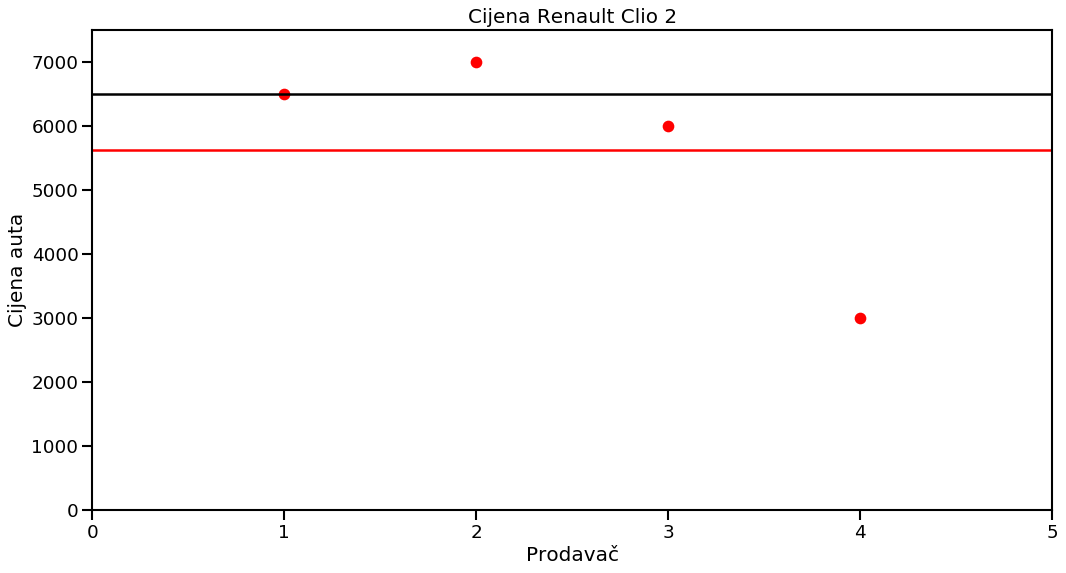

In [177]:
fig=plt.figure()

ax=fig.add_axes([0,0,1,1])
ax.scatter([1,2,3,4], [6500,7000,6000,3000], color='r')

ax.axhline(6500, color="black")
ax.axhline(np.array([6500,7000,6000,3000]).sum()/4, color="red")

ax.set_xlabel('Prodavač')
ax.set_ylabel('Cijena auta')
ax.set_title('Cijena Renault Clio 2')

plt.xlim(0, 5)
plt.ylim(-0, 7500)

plt.show()